# Sinergias e Inovações: Explorando as Potencialidades da Intersecção Interdisciplinar entre Ciência de Dados e Geografia

### **Representação Gráfica das Ações das Forças Populares 25 de Abril (FP-25) em Portugal Continental (1980-1987)**

### Disclaimer
Este mapa é apresentado com o objetivo exclusivamente educativo e informativo, visando proporcionar uma visão geral dos incidentes associados às Forças Populares 25 de Abril (FP-25) em Portugal. As informações aqui contidas foram compiladas a partir de fontes consideradas confiáveis e destinam-se a promover a compreensão histórica e a conscientização sobre os eventos relacionados a este grupo durante o período específico da sua atividade.

É importante notar que este mapa não visa promover, glorificar ou desvalorizar quaisquer ações, ideologias ou indivíduos envolvidos, mas apenas uma contextualização de factos históricos descritos nos documentos disponíveis.

Os criadores e colaboradores deste mapa não se responsabilizam pelo uso indevido das informações aqui contidas ou por quaisquer interpretações ou conclusões feitas por terceiros. Encorajamos os usuários a abordarem este material com um espírito crítico e a procurarem fontes adicionais para uma compreensão mais abrangente dos eventos históricos.

Os dados foram obtidos da Wikipedia, com referências de notícias e fatos. Não nos responsabilizamos por qualquer imprecisão ou incorreção nos dados.

- [x] Ao utilizar este mapa, reconhece e concorda com os termos deste disclaimer.

### Contexto Histórico
<!DOCTYPE html>
<html lang="pt">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Texto com Citações</title>
</head>
<body>

<p>As Forças Populares 25 de Abril (FP-25) emergiram no panorama pós-revolucionário de Portugal, num contexto marcado pela transição democrática após a Revolução dos Cravos de 1974. Esta fase de transição política e social ampliou a formação de diversos grupos, entre eles as FP-25. Constituídas em 1980, através da fusão de organizações revolucionárias de extrema-esquerda, contestavam a evolução política do país, nomeadamente a instalação de um regime democrático, pluralista e parlamentar, ao considerarem o modelo ocidental e capitalista como insuficiente perante as necessidades da realidade portuguesa. A 20 de abril de 1980, uma explosão simultânea de centenas de petardos pelo país e o lançamento de milhares de panfletos com a sigla e o manifesto da organização, as FP-25 dão-se a conhecer ao país. Intitulado de “Manifesto ao Povo Trabalhador”, apontavam como objetivos fundamentais “o derrube do regime, a instauração da ditadura do proletariado, a criação de um exército popular e a implantação do socialismo”. 1</p> 

<p>O grupo realizou várias ações, visando influenciar o curso político do país e resguardar o “Projeto Global” ao “evitar um golpe de Estado de cariz fascista”, admitindo a possível necessidade de criar condições para a tomada de poder e para a futura instauração do poder popular. 2</p> 

<p>Com mais de uma dezena de mortos e feridos, são estas as ações que distinguem as FP-25 de movimentos anteriores, pelos incidentes provocados no seio da sociedade portuguesa e pelos assaltos a bancos e empresas, de onde furtaram elevadas quantias. As FP-25 representam uma faceta da complexidade política e social do período pós-revolucionário em Portugal, evidenciando os desafios enfrentados na consolidação da democracia. 3</p>

<p>Este contexto histórico sublinha a importância de analisar tais movimentos dentro do espectro mais amplo das dinâmicas de mudança nacional.</p>

<blockquote>
  <p><strong>H1:</strong> <a href="https://observador.pt/especiais/fp-25-otelo-teve-muito-mais-apoiantes-do-que-socrates-entrevista-a-nuno-goncalo-pocas/">Fonte 1</a></p>
</blockquote>

<blockquote>
  <p><strong>H2:</strong> Vilela, A. J. (2005). <i>Viver e Morrer em nome das FP-25</i>. Lisboa: Casa das Letras.</p>
</blockquote>

<blockquote>
  <p><strong>H3:</strong> <a href="https://sicnoticias.pt/pais/2021-04-20-FP-25-de-Abril-a-organizacao-terrorista-que-matou-17-pessoas-nos-anos-80-8fe36a99">Fonte 2</a></p>
</blockquote>

</body>
</html>


In [14]:
import pandas as pd
import re
from datetime import datetime
import folium

import warnings 
warnings.filterwarnings("ignore")

incidents = pd.read_csv('DATA.csv')

Importadas as bibliotecas necessárias e arquivo csv 

In [15]:
incidents['ID'] = range(1, len(incidents) + 1)

incidents.set_index('ID', inplace = True)
incidents.head(1)

,Folder name,Folder color,Latitude,Longitude,Title,Description,Color,Phone number,Timestamp,Pin icon code
ID,,,,,,,,,,
1,NaN,71b300,41.336001,-8.560611,1 de Agosto de 1984,Assalto ao Banco Espírito Santo na Trofa. Foi ...,71b300,NaN,2024-02-08T17:16:00Z,-1


Estado inicial do dataset gerado pelo 	[Map Marker](https://www.mapmarker.app/)

In [16]:
columns_to_drop = ['Folder name', 'Phone number', 'Pin icon code', 'Timestamp', 'Folder color']
incidents.drop(columns=columns_to_drop, inplace = True)

incidents['Color'].replace('ff9800', 'ff5722', inplace=True)

Exclusão de colunas não necessárias e correção de um erro na cor.

In [17]:
incidents['Color'].unique()

array(['71b300', '3f51b5', 'ff5722', 'ffeb3b', 'f44336', '9e9e9e',
       '795548', '9c27b0', '607d8b'], dtype=object)

In [18]:
incident_type = {'71b300' : 'Assalto', 
                '3f51b5': 'Bombas Detonadas',
                'ff5722' : 'Agressão',
                'ffeb3b' : 'Vandalismo',
                'f44336' : 'Assassinato',
                '9e9e9e' : 'Assalto com Vítimas Mortais', 
                '795548' : 'Tentativa de Assalto (falhada)', 
                '9c27b0' : 'Bombas Não Detonadas',
                '607d8b' : 'Fugas da Prisão'
                 }

incidents['Categoria'] = incidents['Color'].map(incident_type)

Criação de um dicionário para criar coluna "categoria"

In [19]:
incidents = incidents.astype({'Color': 'category',  
                          'Categoria': 'category'})

In [20]:
incidents.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 1 to 123
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Latitude     123 non-null    float64 
 1   Longitude    123 non-null    float64 
 2   Title        123 non-null    object  
 3   Description  123 non-null    object  
 4   Color        123 non-null    category
 5   Categoria    123 non-null    category
dtypes: category(2), float64(2), object(2)
memory usage: 34.0 KB


Optimização de tipo de dados.

In [21]:
month_mapping = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12,
       
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12,
}

def convert_title_to_date(title):
    match = re.search(r'(\d+) de (\w+) de (\d+)', title)
    if match:
        day, month_text, year = match.groups()
        month = month_mapping.get(month_text, 0)
        if month != 0:
            date_str = f"{year}-{month:02d}-{day}"
            return pd.to_datetime(date_str, format="%Y-%m-%d").date()
    return None



incidents['Data'] = incidents['Title'].apply(convert_title_to_date)
incidents.drop(columns=['Title'], inplace=True)

Transformação de data de string para date time, formato aceite nos algoritmos depois utilizados.

In [22]:
import plotly.express as px

In [23]:
map_fig = px.scatter_mapbox(incidents,
                            lat='Latitude',
                            lon='Longitude',
                            hover_name='Data',
                            hover_data={'Description': True},
                            color='Categoria',
                            size_max=15,
                            zoom=5.5,
                            height=800,
                            width=1000,
                            center={"lat": 39.5, "lon": -8.0},
                            mapbox_style="open-street-map")

map_fig.update_traces(marker=dict(size=15,)) 

map_fig.show()


In [24]:
#import plotly.offline as pyo

# Salvar o mapa como um arquivo HTML
#pyo.plot(map_fig, filename='mapa.html')


Criação do mapa. ( o mapa é interativo )

In [25]:
color_mapping = {
    'Assalto': './Icons/assalto.png',
    'Bombas Detonadas': './Icons/Bomb-Explode.png',
    'Agressão': './Icons/agressao.png',
    'Vandalismo': './Icons/vandalismo.png',
    'Assassinato': './Icons/assassinato.png',
    'Assalto com Vítimas Mortais': './Icons/assalto-com-vitima.png',
    'Tentativa de Assalto (falhada)': './Icons/assalto-falhado.png',
    'Bombas Não Detonadas': './Icons/bomb-no-explode.png',
    'Fugas da Prisão': './Icons/prisao.png'
}

icone_size = (40, 40)

# Criar um mapa Folium
folium_map = folium.Map(
    location=[39.5, -8.0],
    zoom_start=6.8,
    tiles=None 
)


folium.TileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', attr='Tiles by © OpenStreetMap contributors').add_to(folium_map)

for index, row in incidents.iterrows():
    categoria = row['Categoria']
    icone = folium.features.CustomIcon(icon_image=color_mapping.get(categoria, './Icons/gray.png'), icon_size=(30, 30))
    

    popup_html = f"""
    <div style="min-width: 300px;">
        <h4>{row['Categoria']}</h4>
        <p>{row['Description']}</p>
        <p><strong>Data:</strong> {row['Data']}</p>
    </div>
    """
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_html,
        icon=icone,
        tooltip=row['Categoria']
    ).add_to(folium_map)


attribution_html = """
<div id="attribution" style="position: fixed; bottom: 10px; left: 10px; background-color: white; padding: 5px; border-radius: 5px; z-index: 1000;">
    Map data © <a href="https://www.linkedin.com/in/kikobatistaa" target="_blank">Francisco Batista</a> & 
    <a href="https://www.linkedin.com/in/tomás-pereira-85407425b/" target="_blank">Tomás Pereira</a>, Tiles by 
    © <a href="http://openstreetmap.org" target="_blank">OpenStreetMap</a> contributors, under 
    <a href="http://www.openstreetmap.org/copyright" target="_blank">ODbL</a>.
</div>
<script>
    var attribution = document.getElementById('attribution');
    var mapDiv = document.getElementsByClassName('folium-map')[0];
    mapDiv.appendChild(attribution);
</script>
"""

# Salvar o mapa Folium como um arquivo HTML
folium_map.save('mapa_final.html')

# Abrir o arquivo HTML e inserir a atribuição manualmente
with open('mapa_final.html', 'r+') as file:
    file_data = file.read()
    # Adicionar a atribuição manualmente
    file_data = file_data.replace('</body>', attribution_html + '</body>')
    file.seek(0)
    file.write(file_data)
    file.truncate()



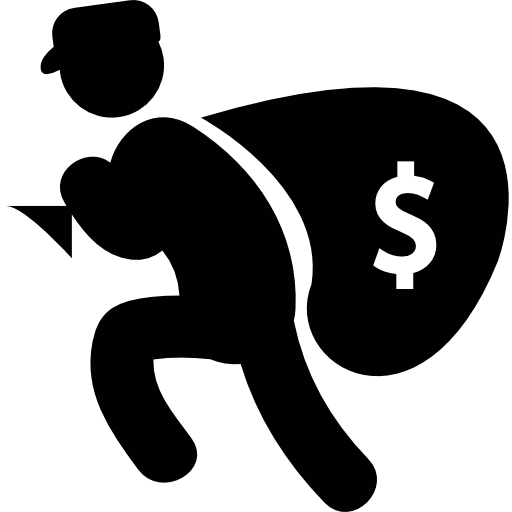
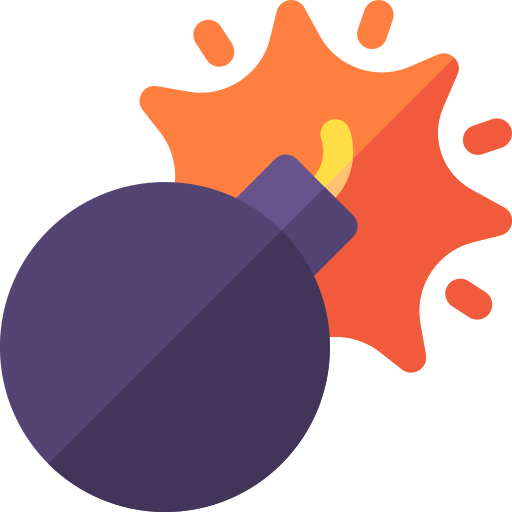
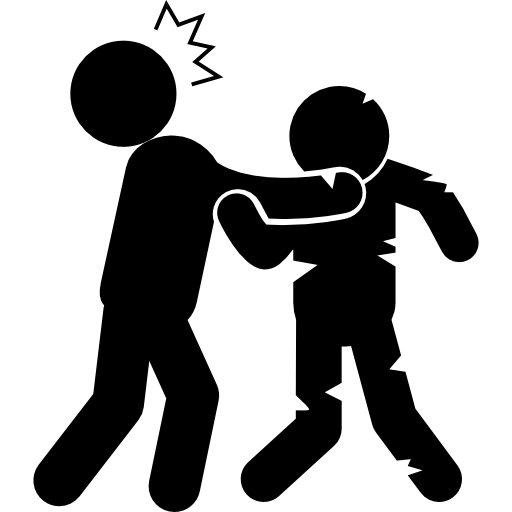
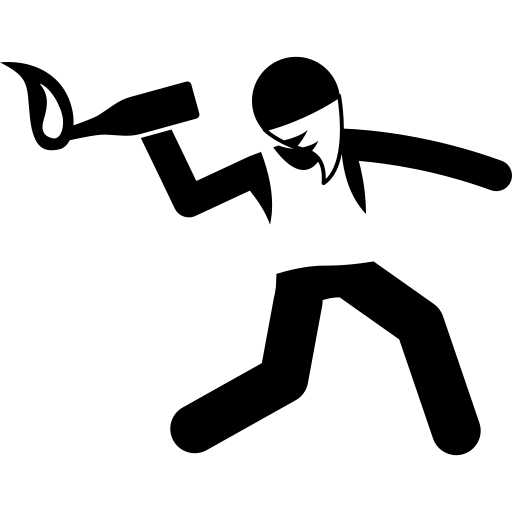
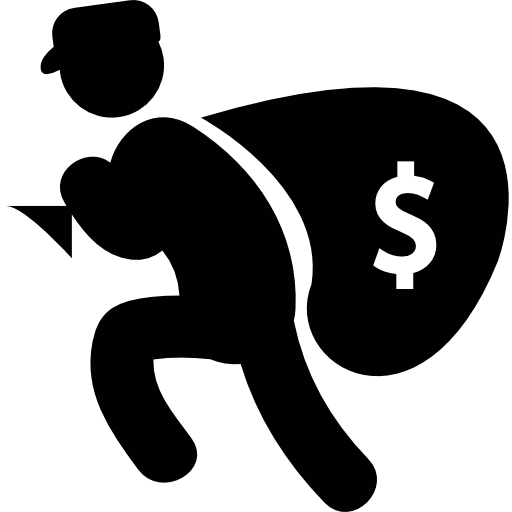
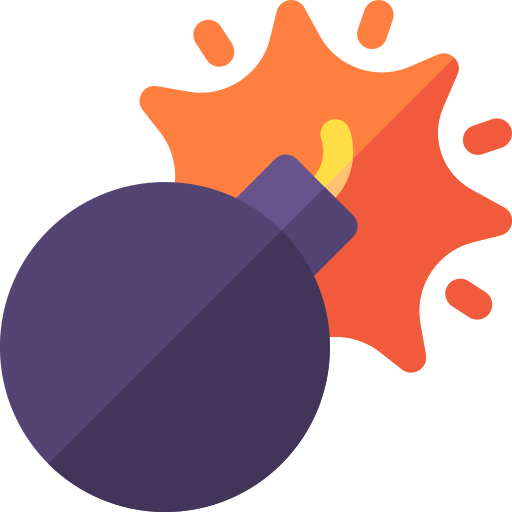
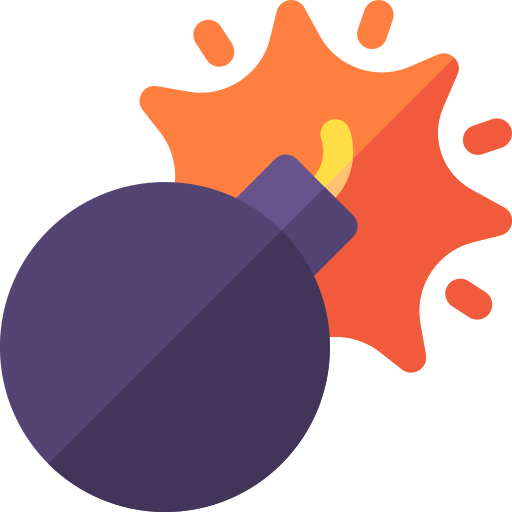
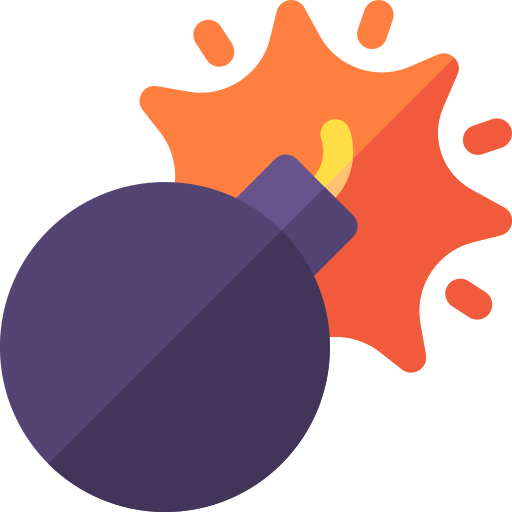
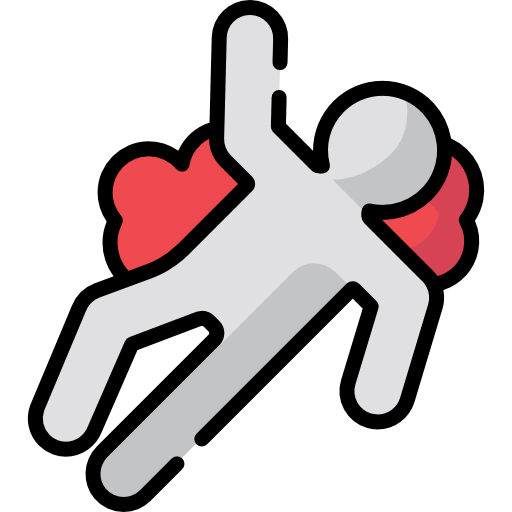
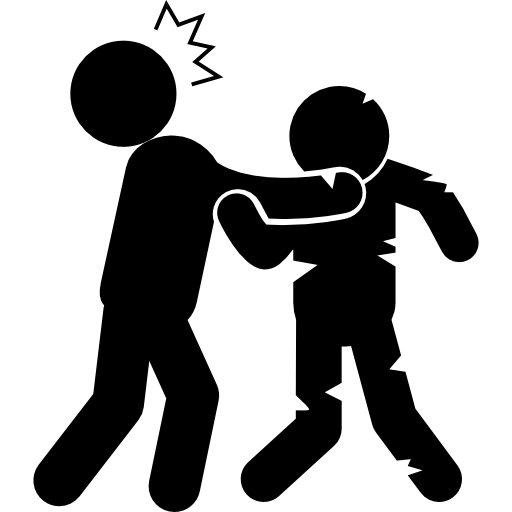
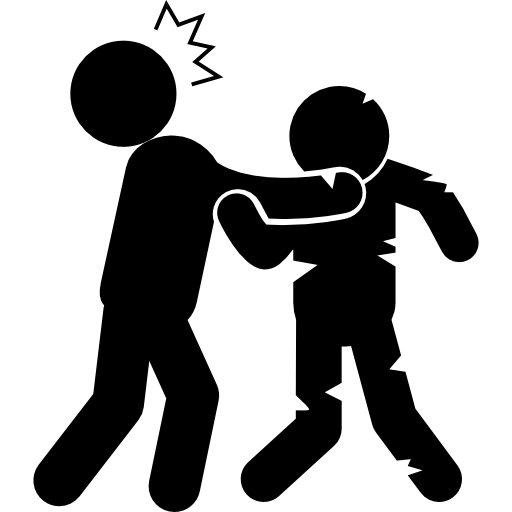
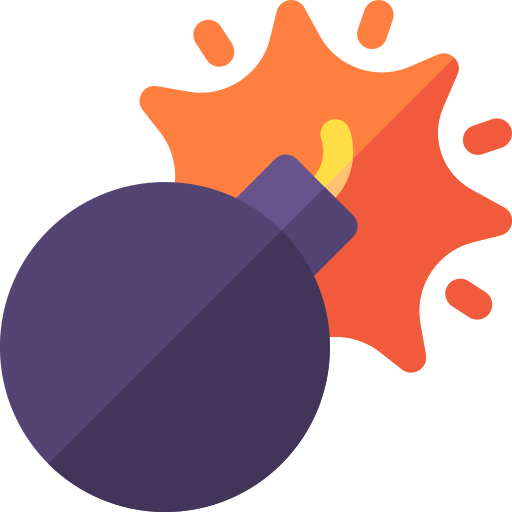
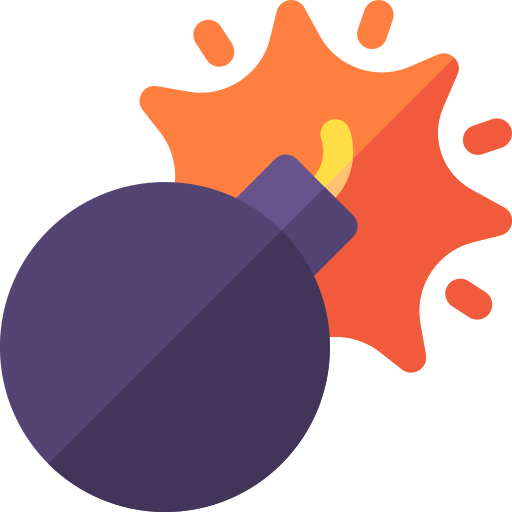
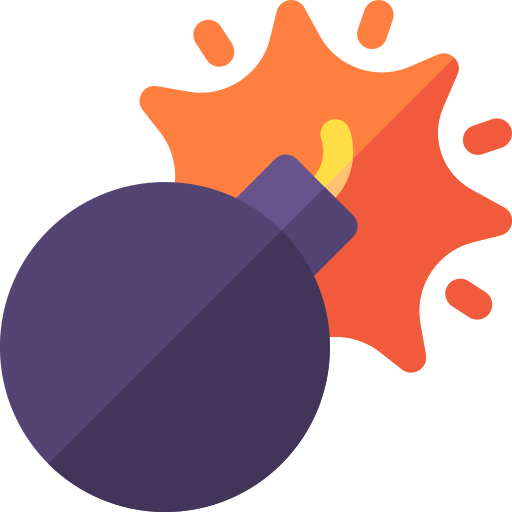
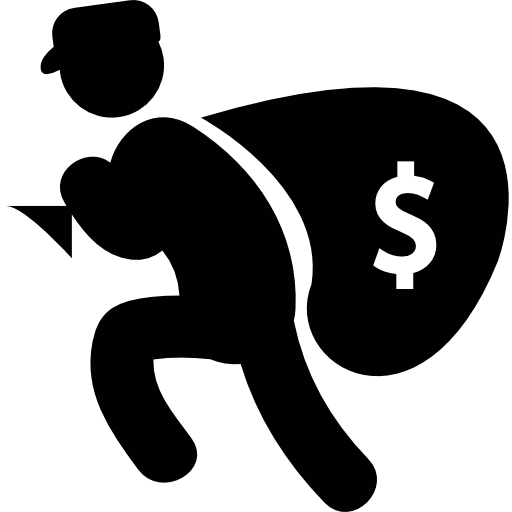
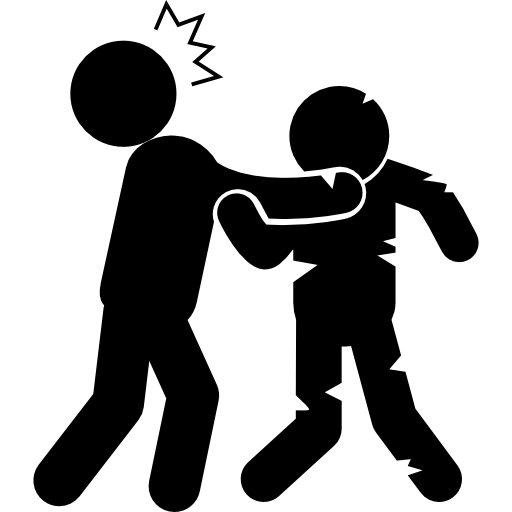
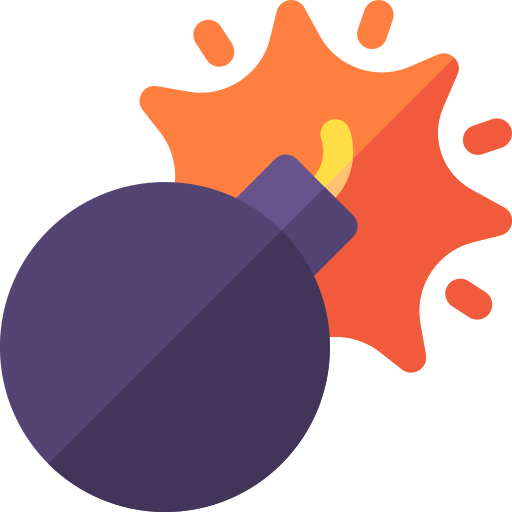
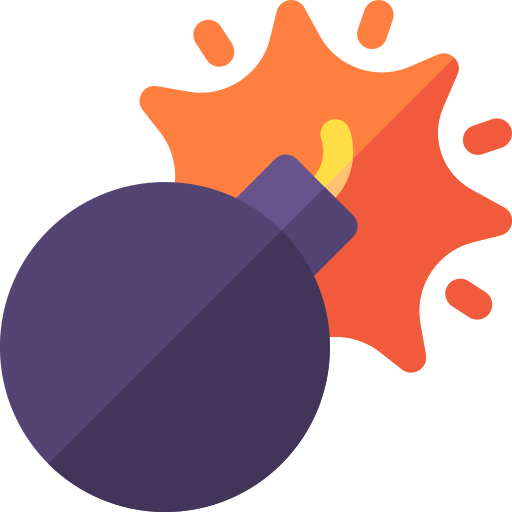
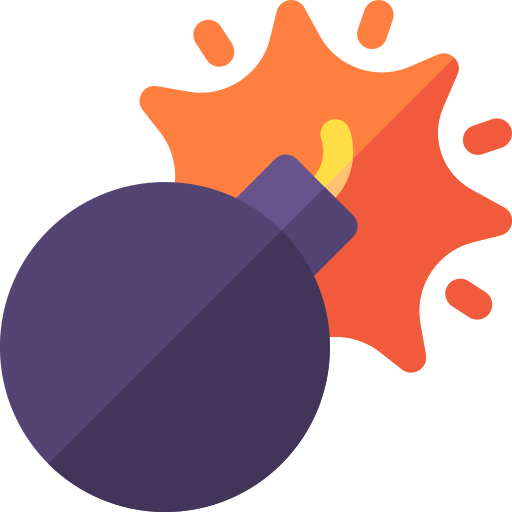
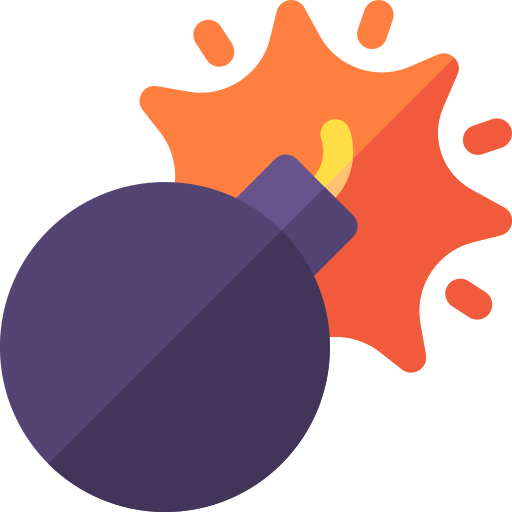
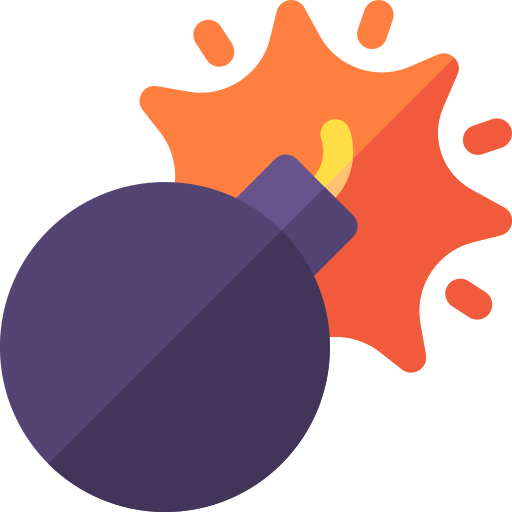
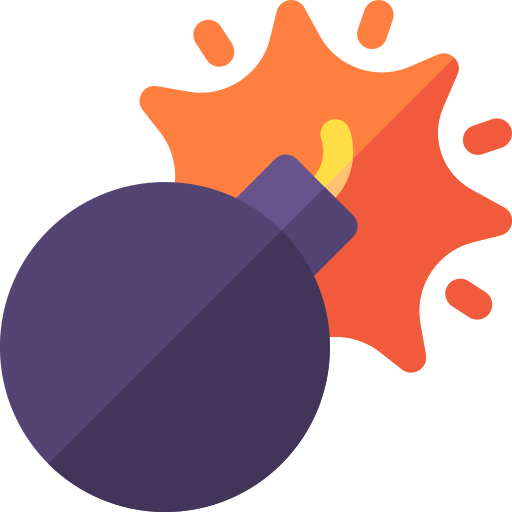
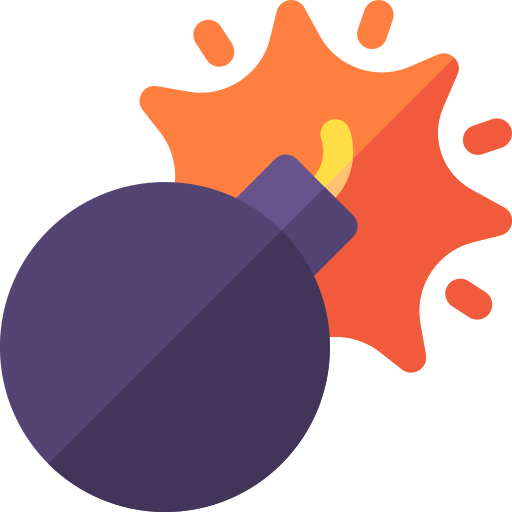
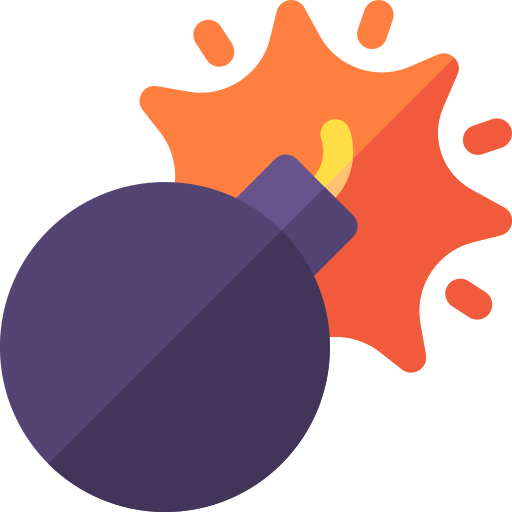
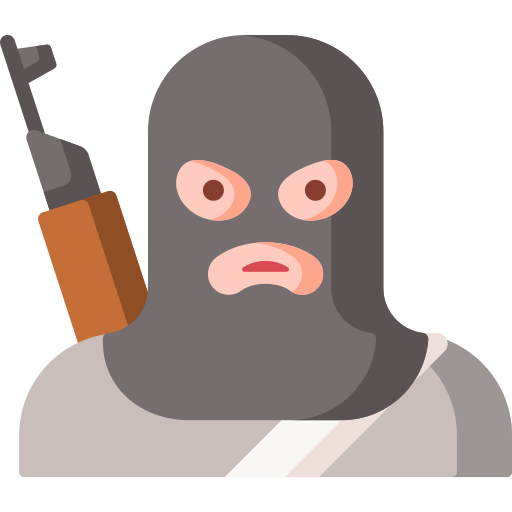
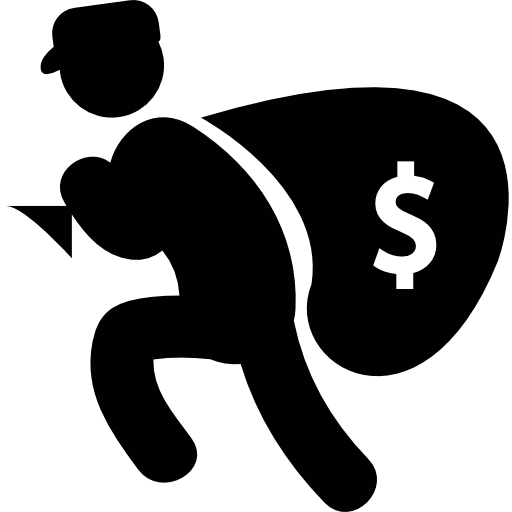
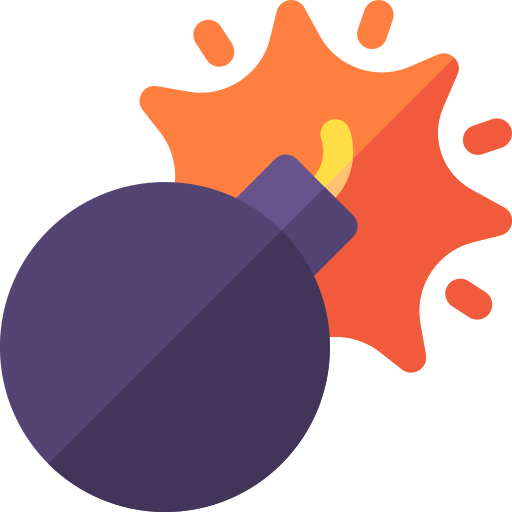
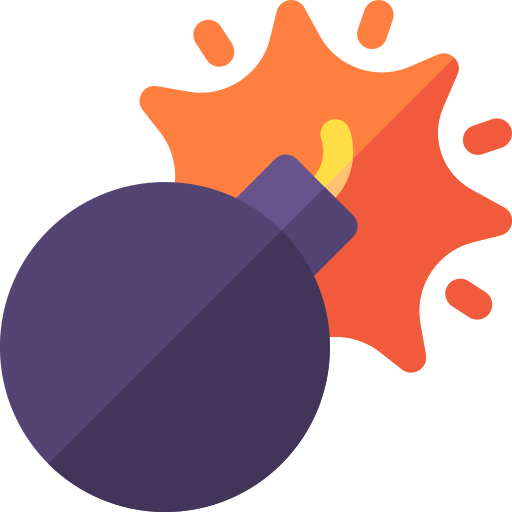
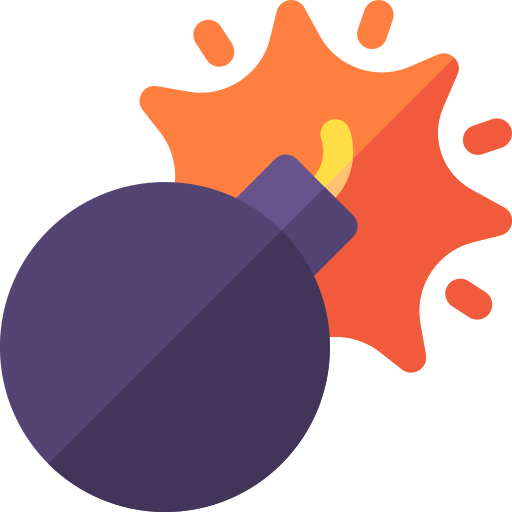
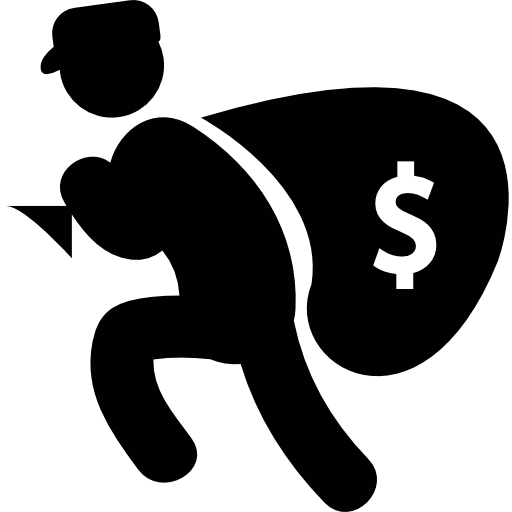
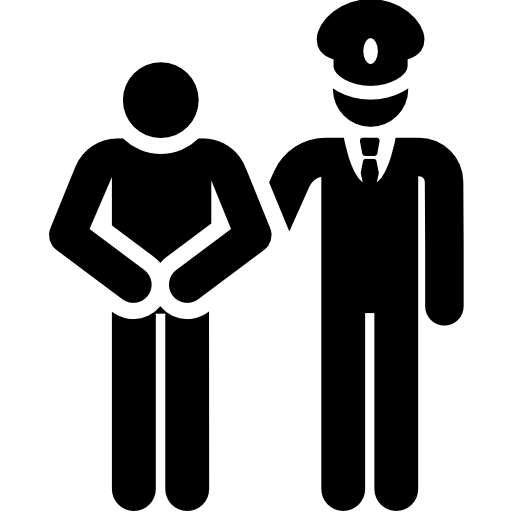
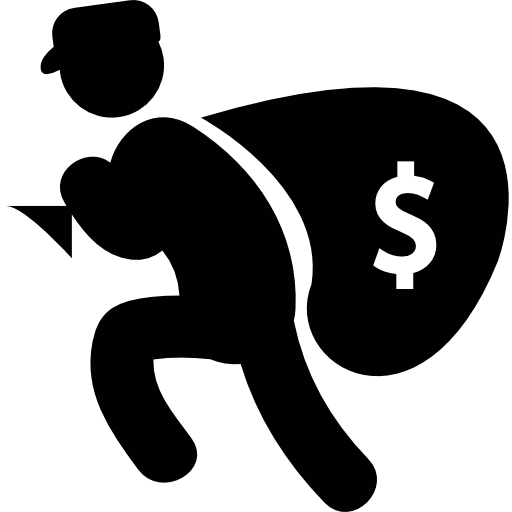
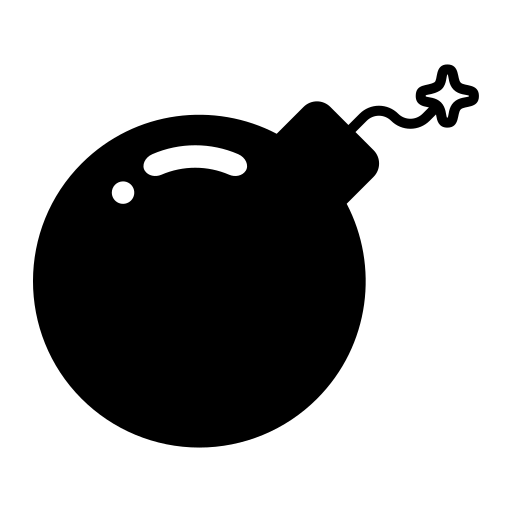
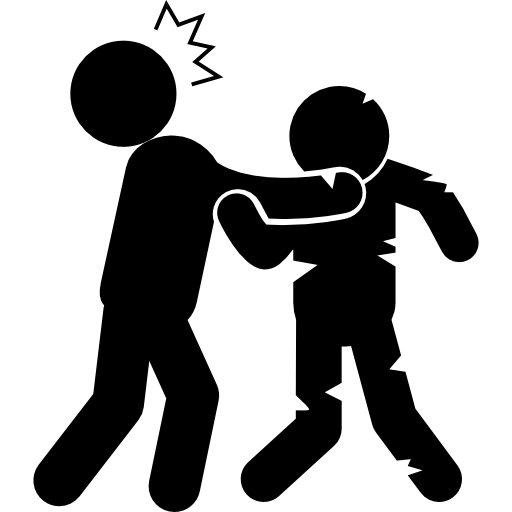
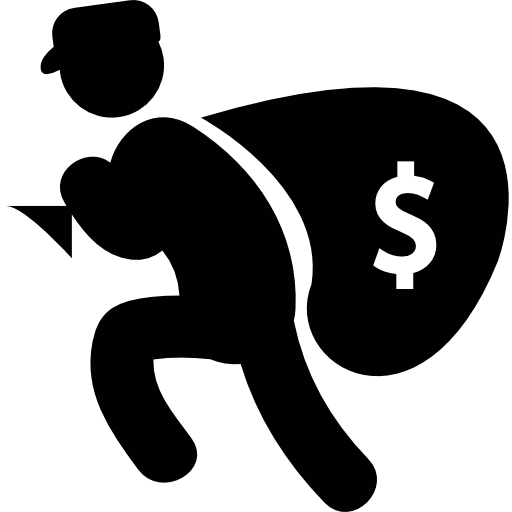
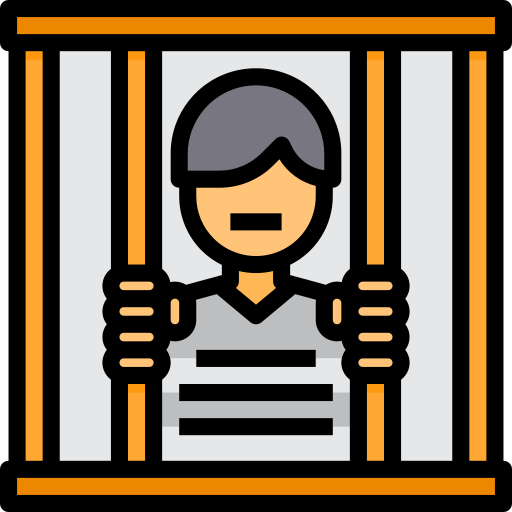
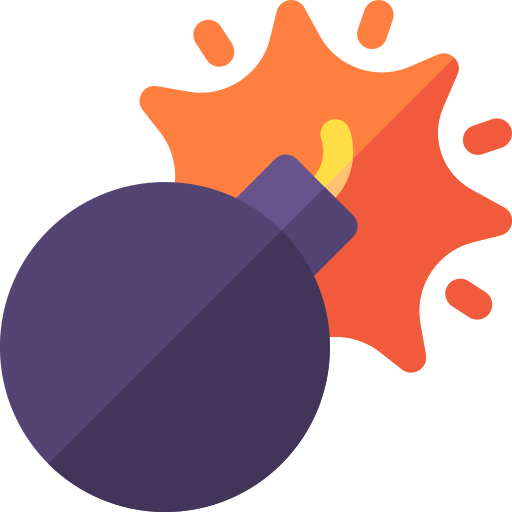
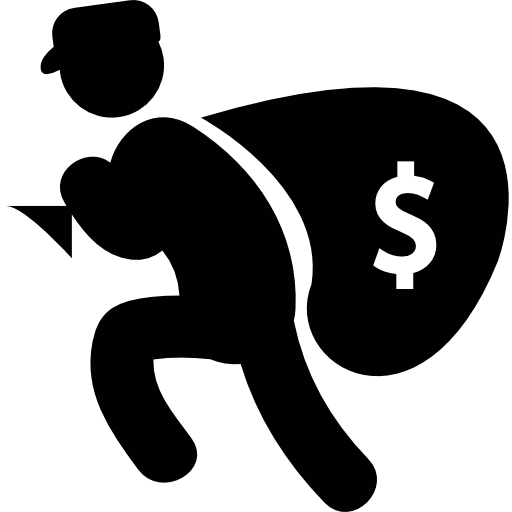
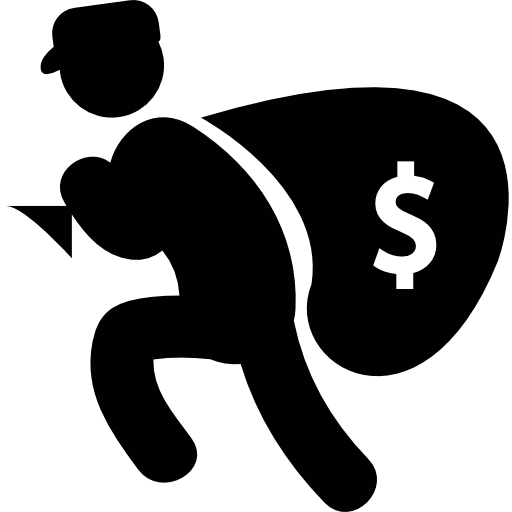
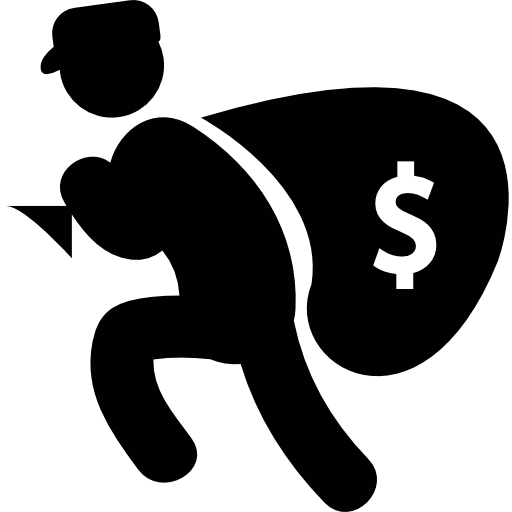
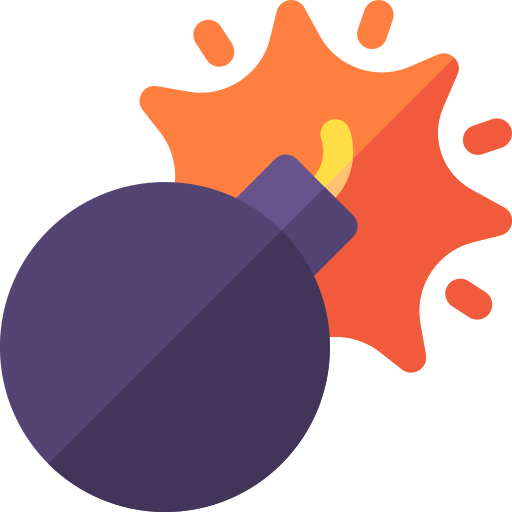
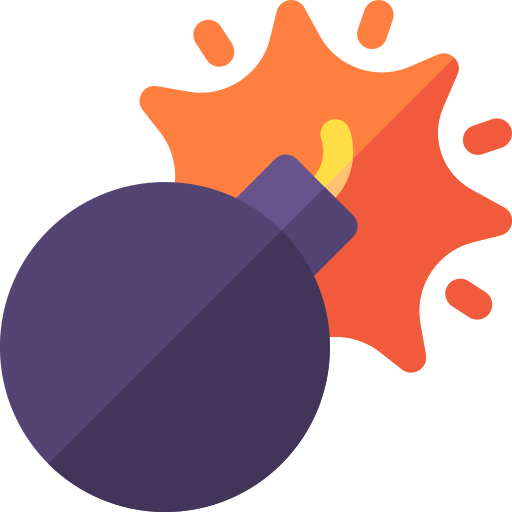
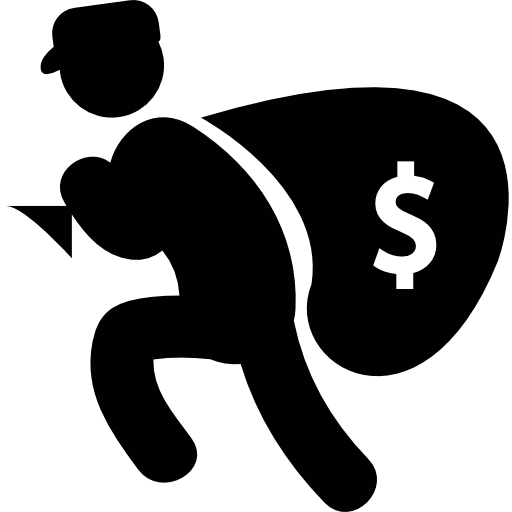
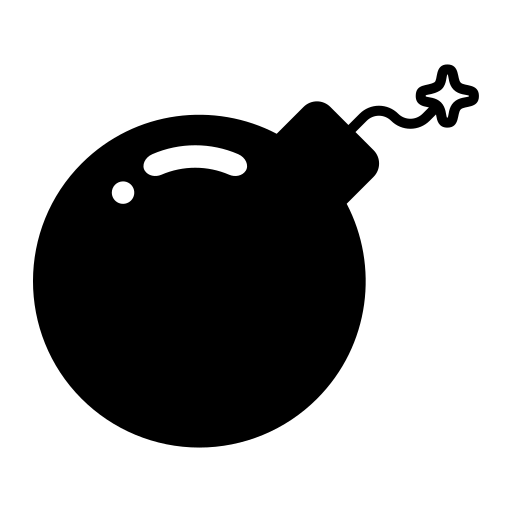
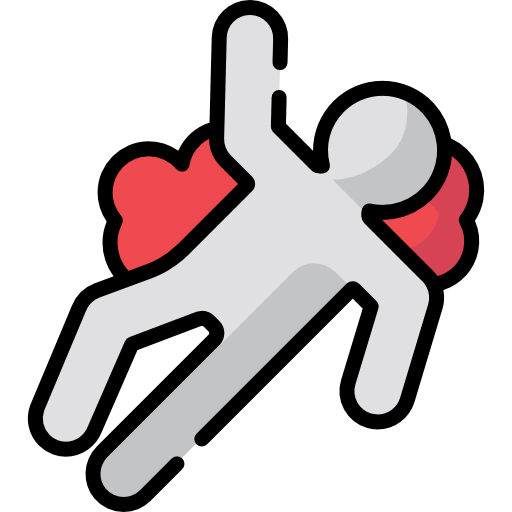
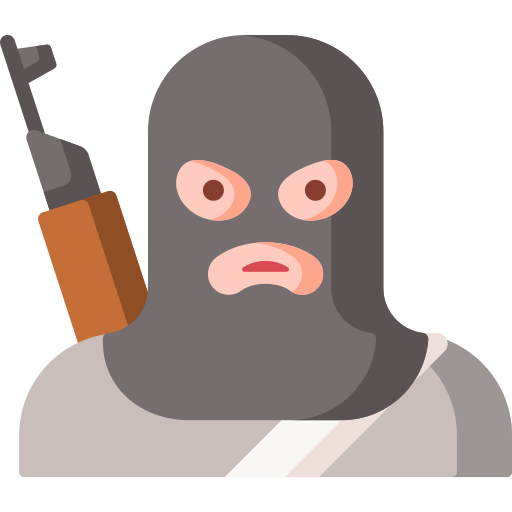
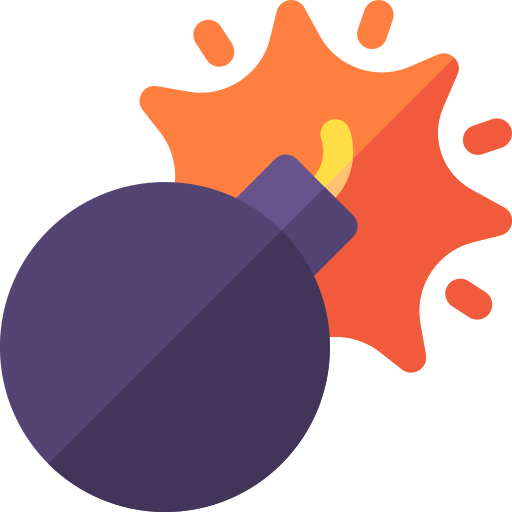
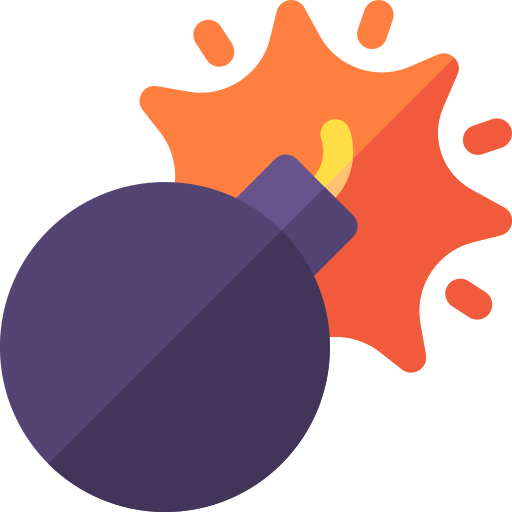
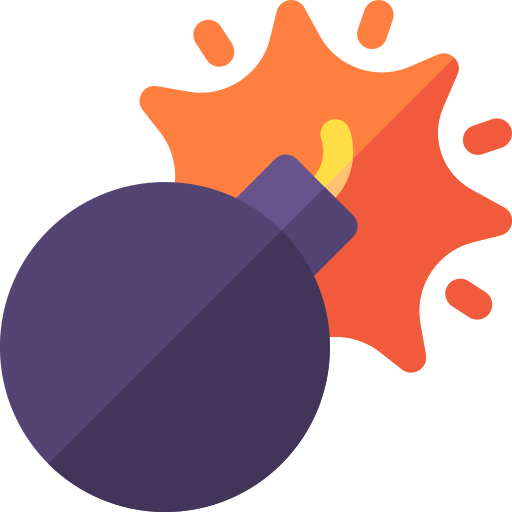
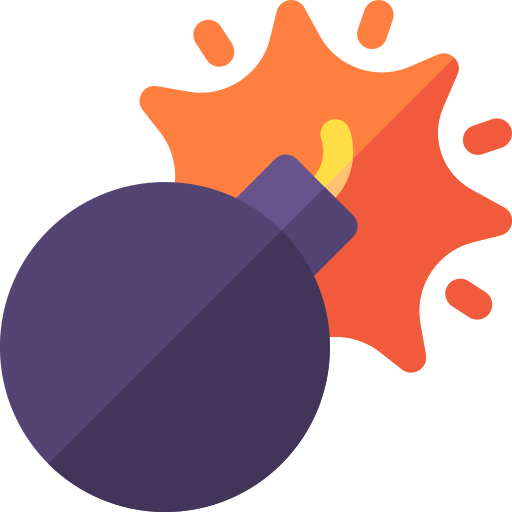
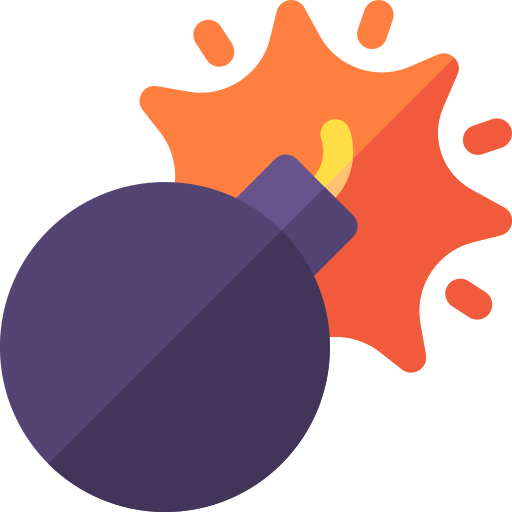
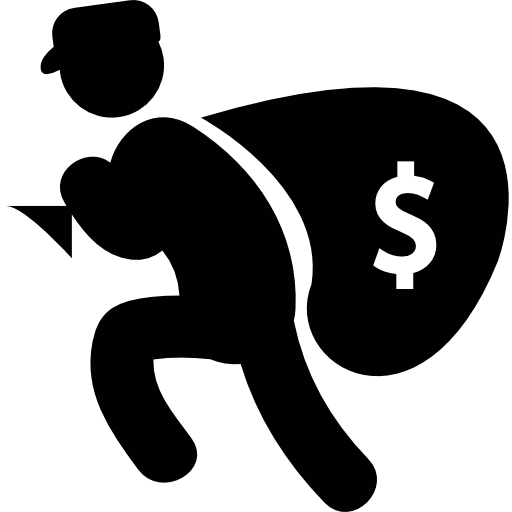
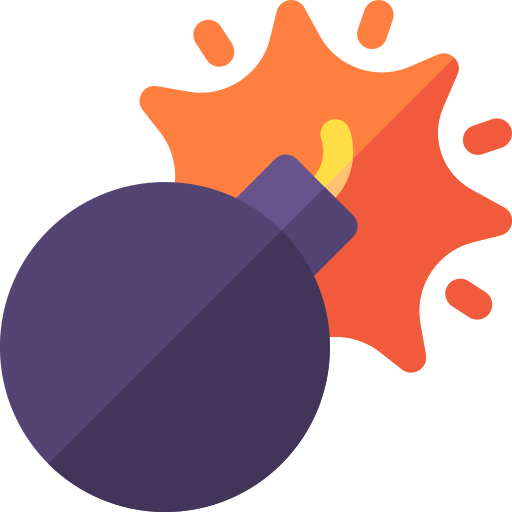
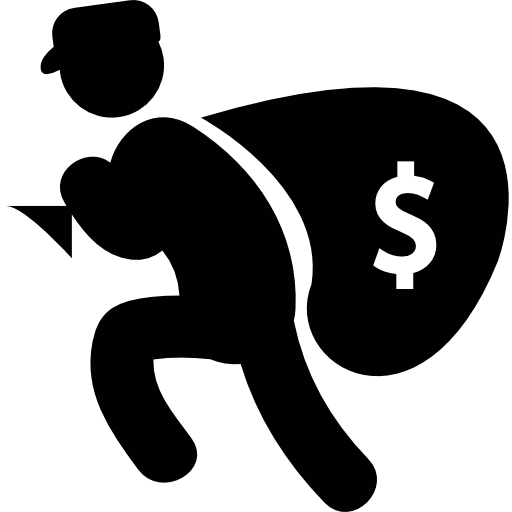
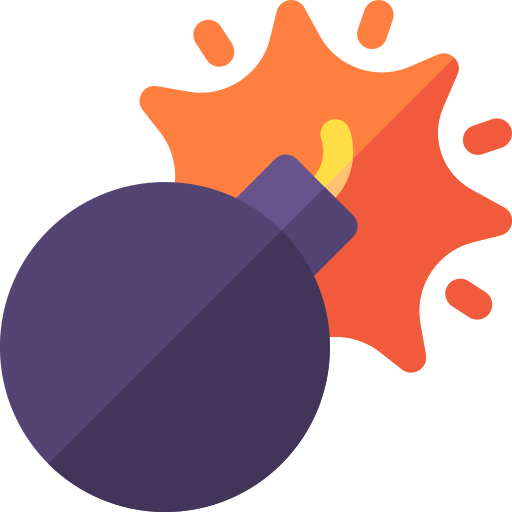
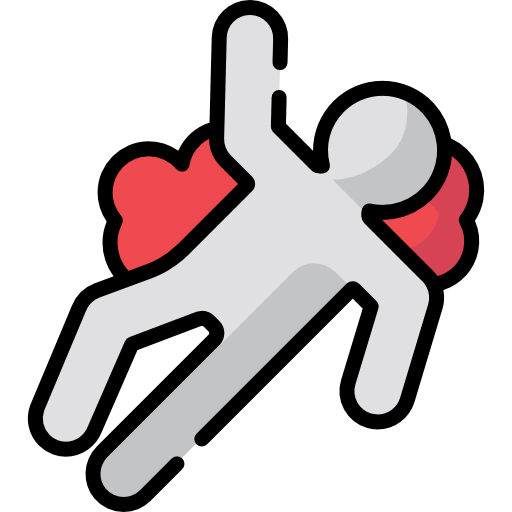
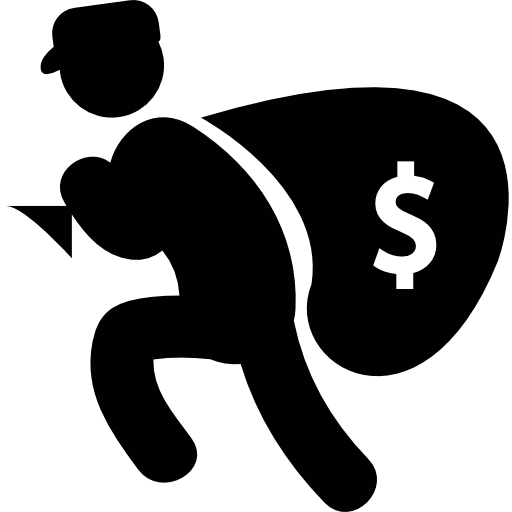
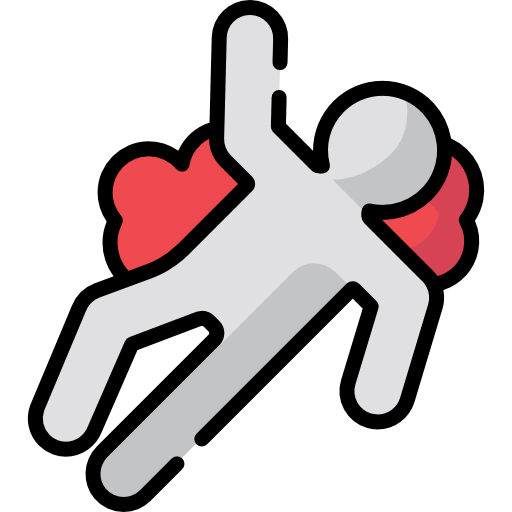
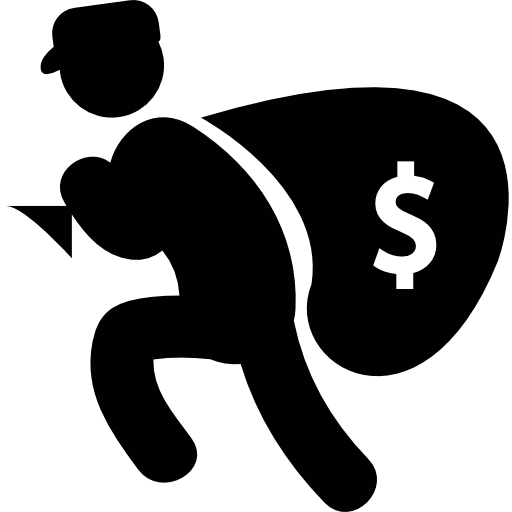
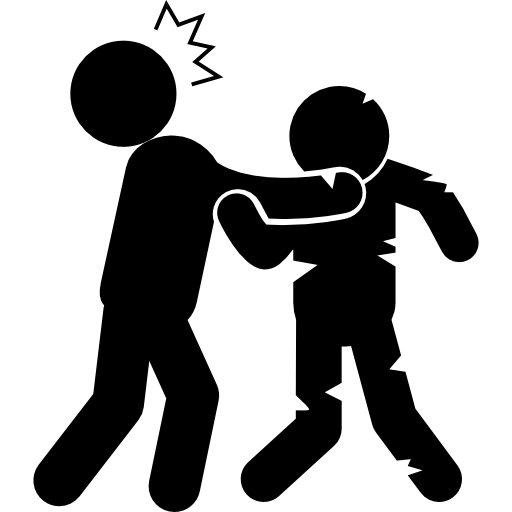
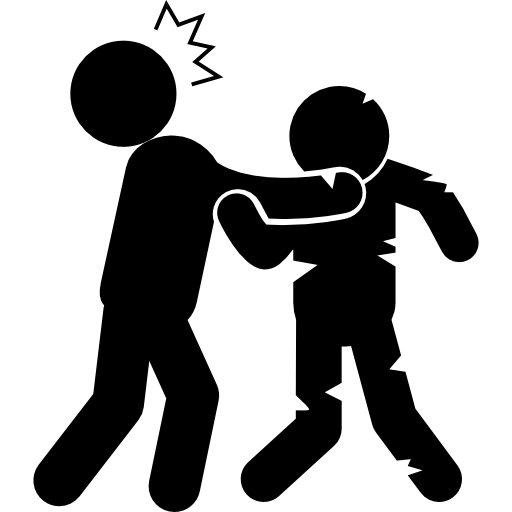
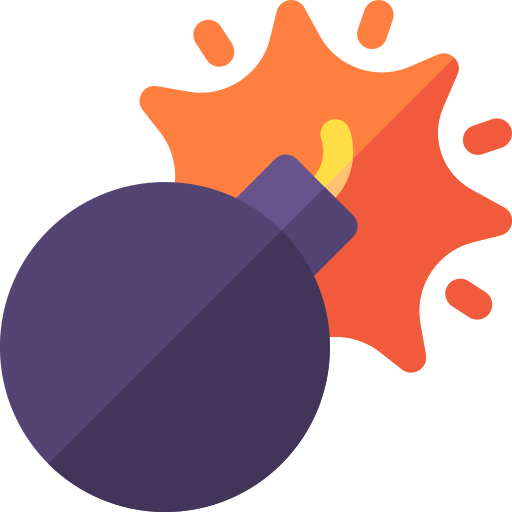
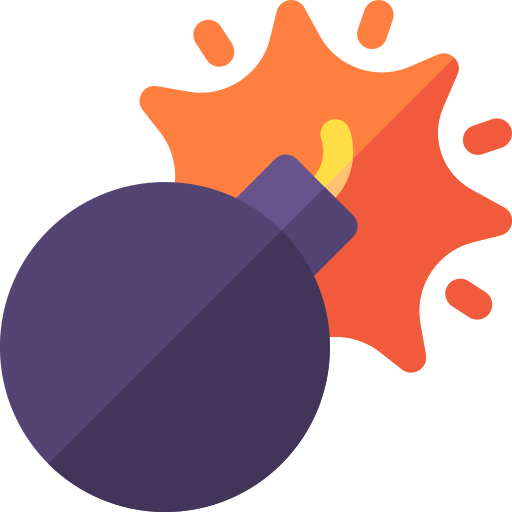
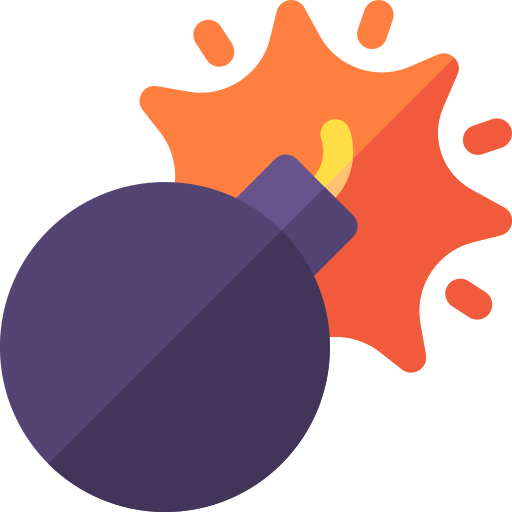
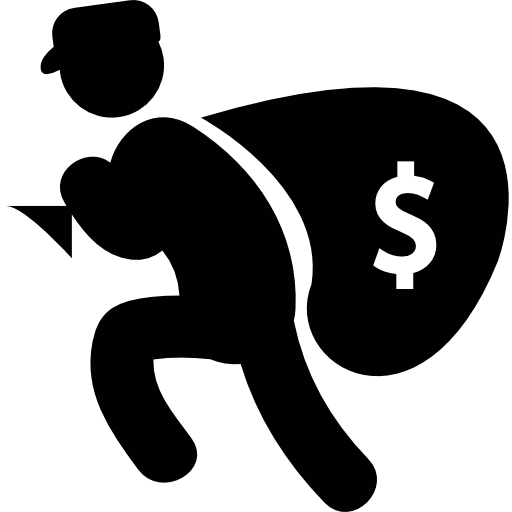
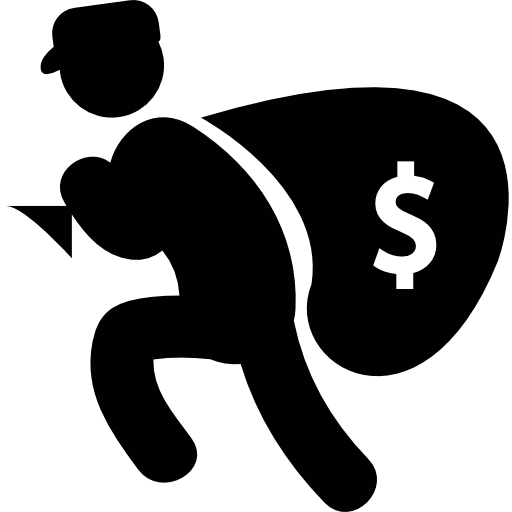
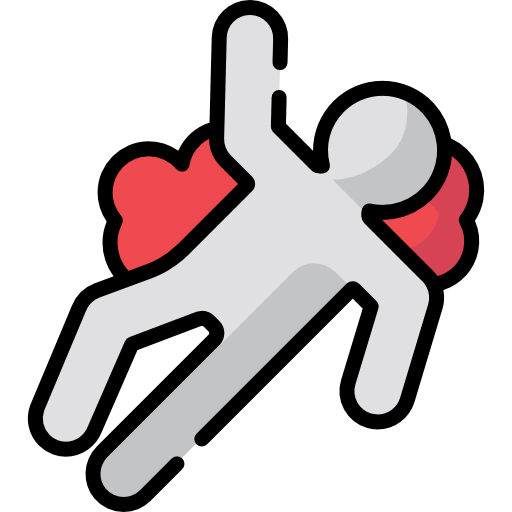
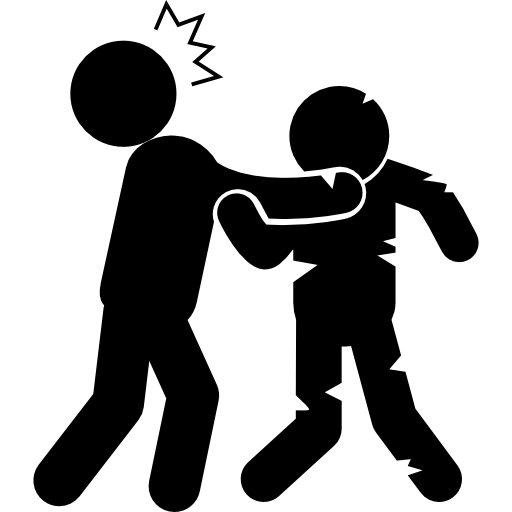
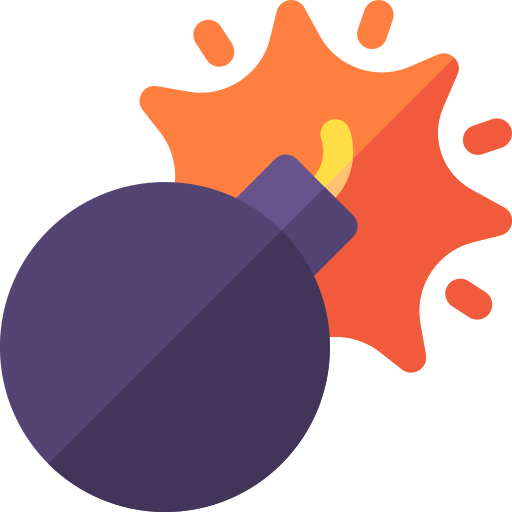
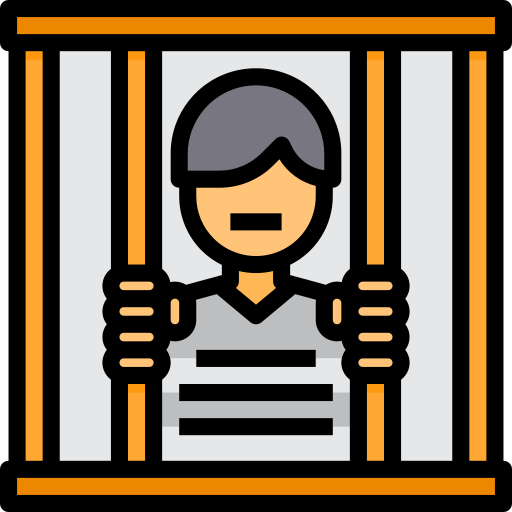
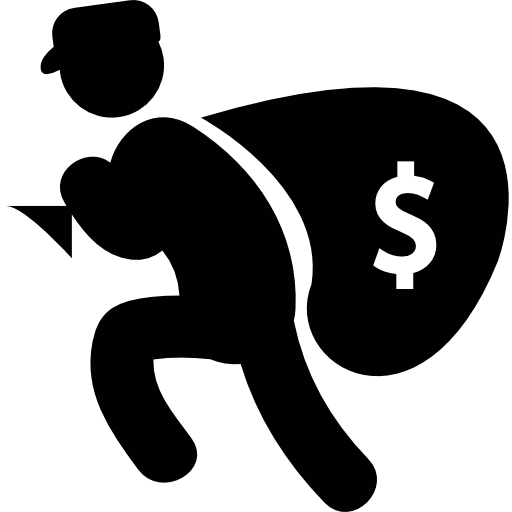
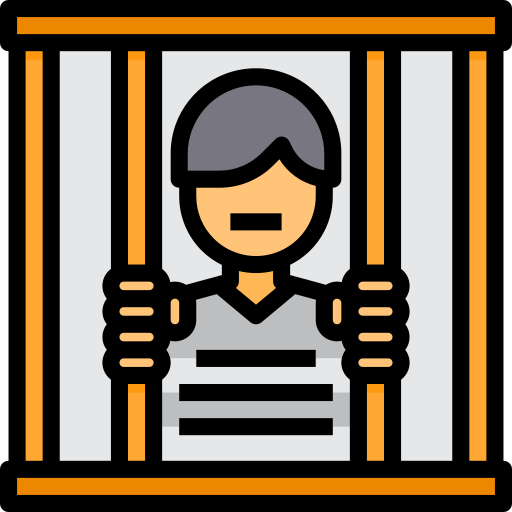
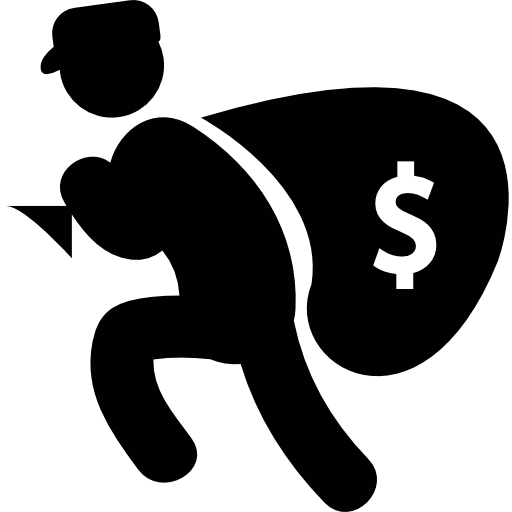
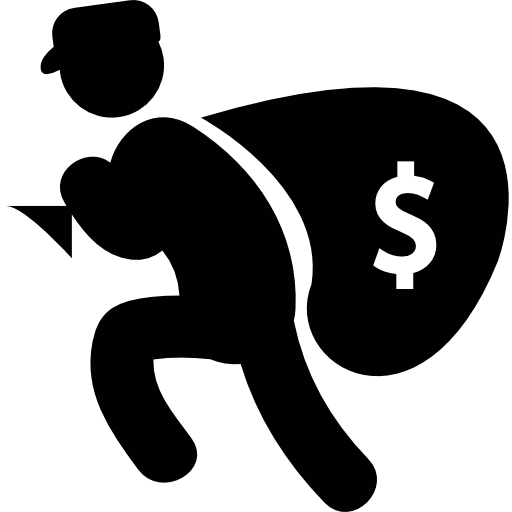
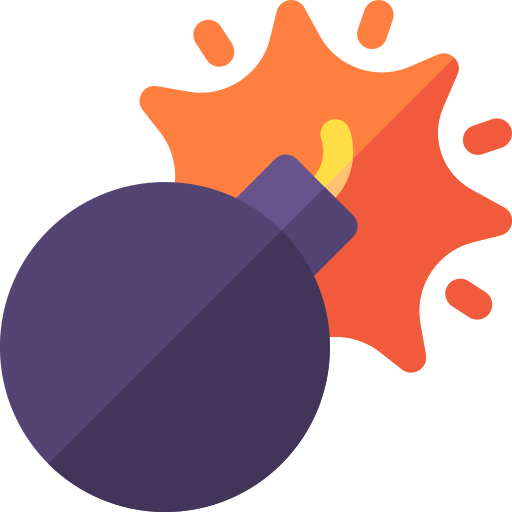
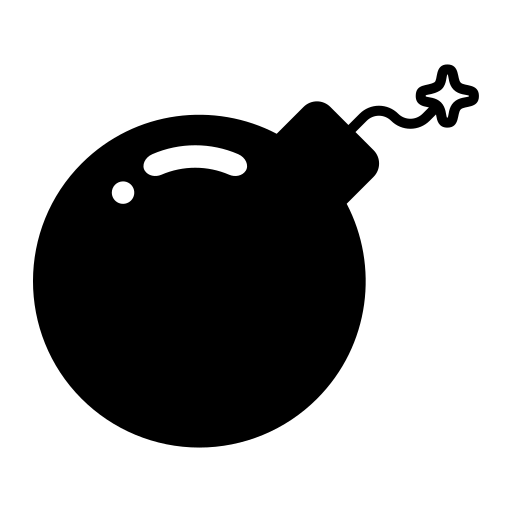
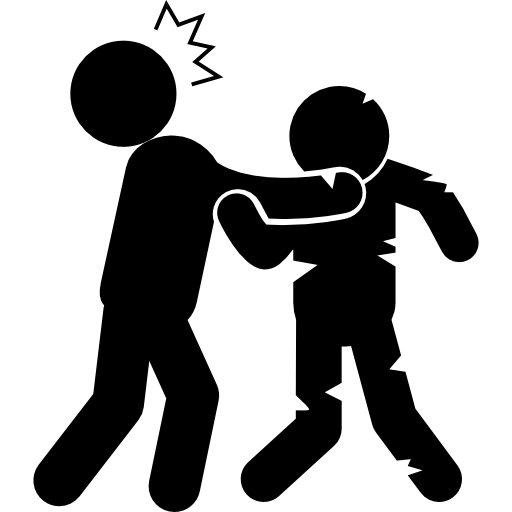
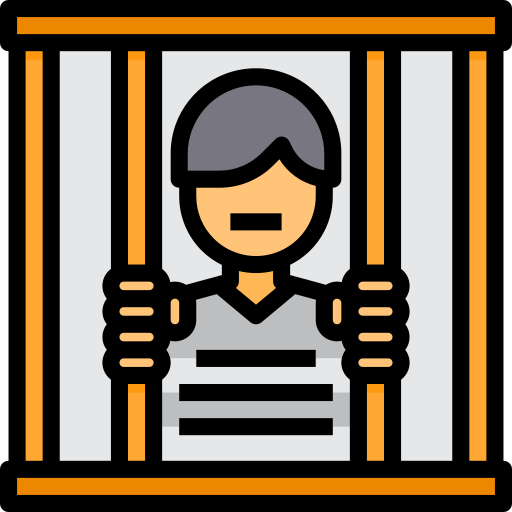
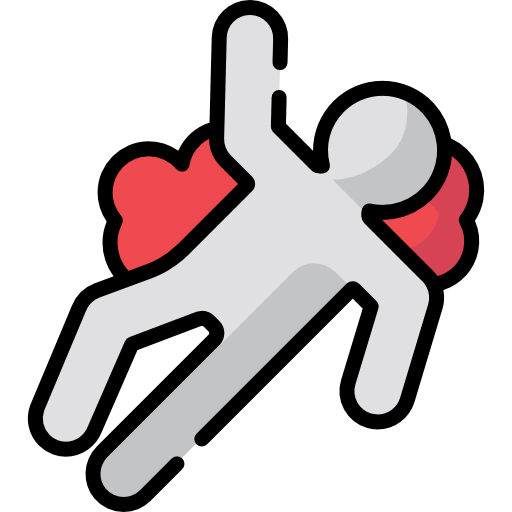
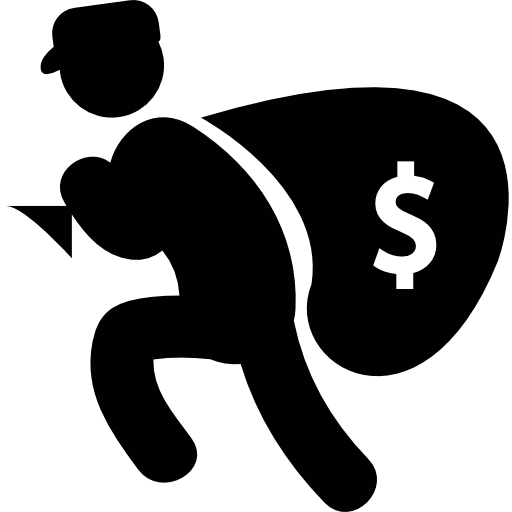
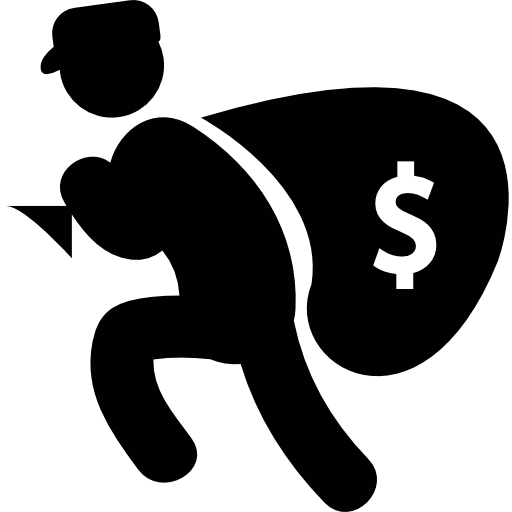
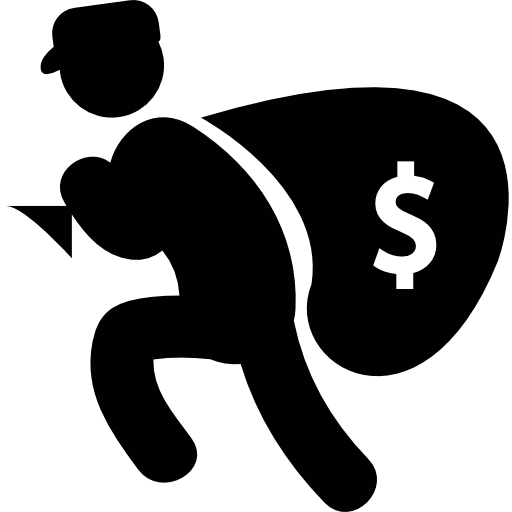
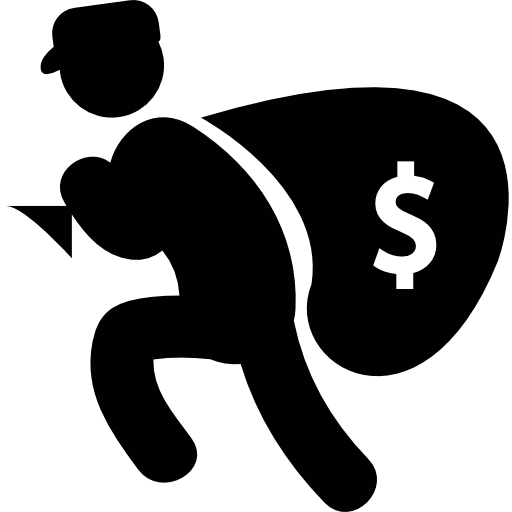
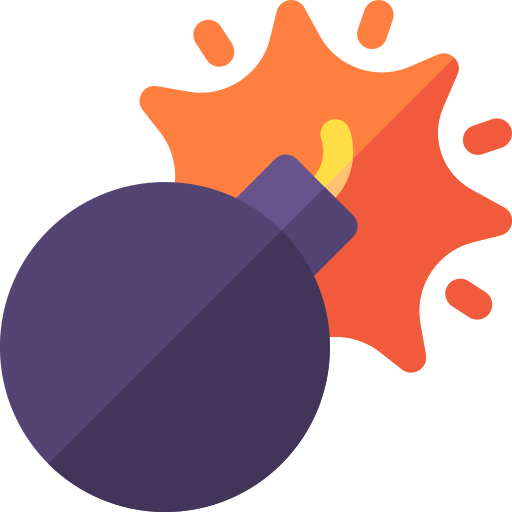
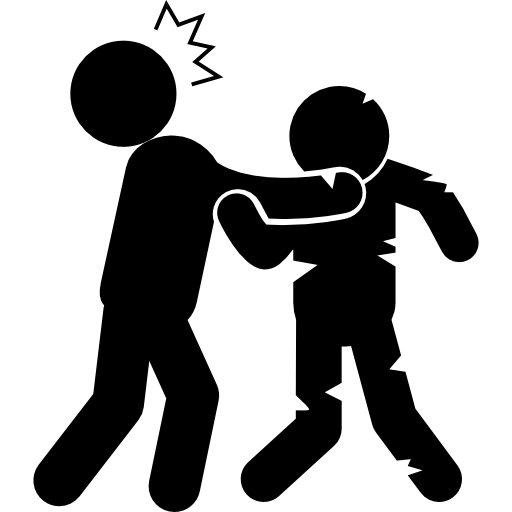
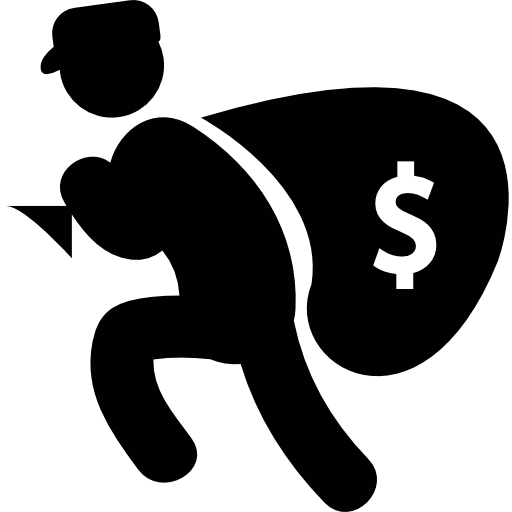
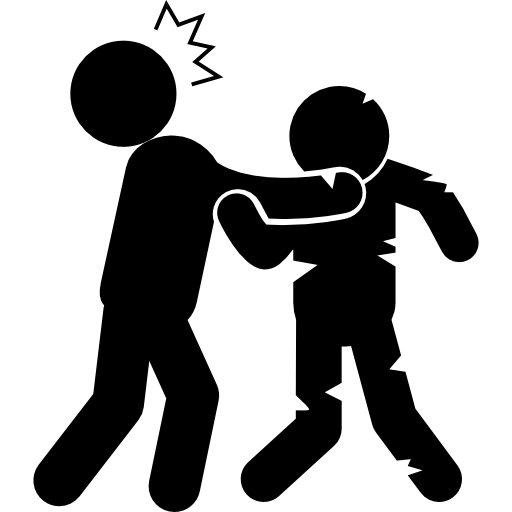
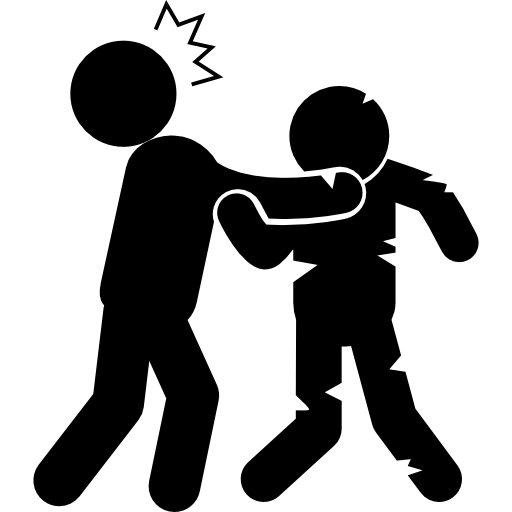
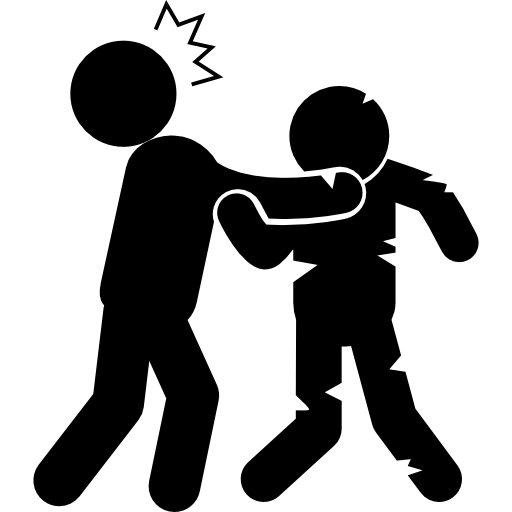
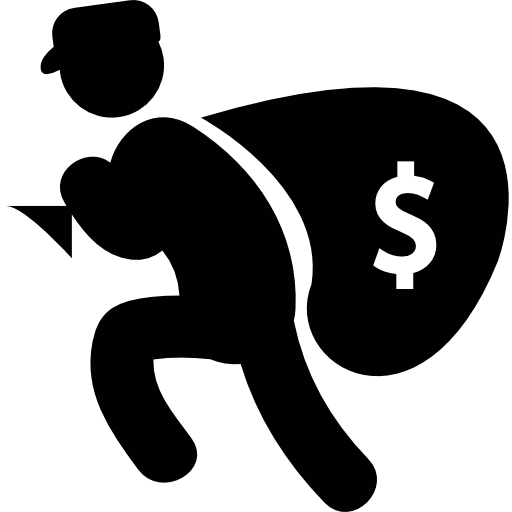
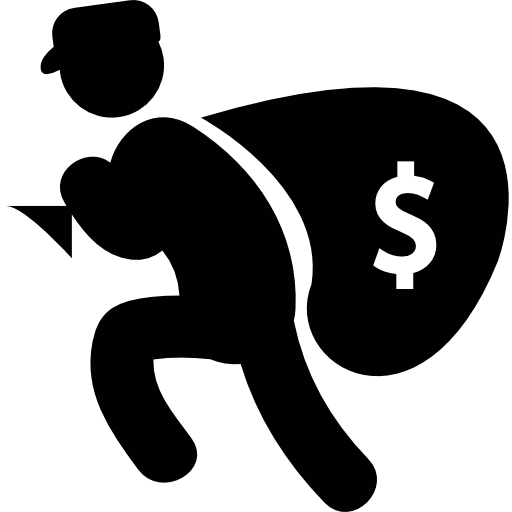
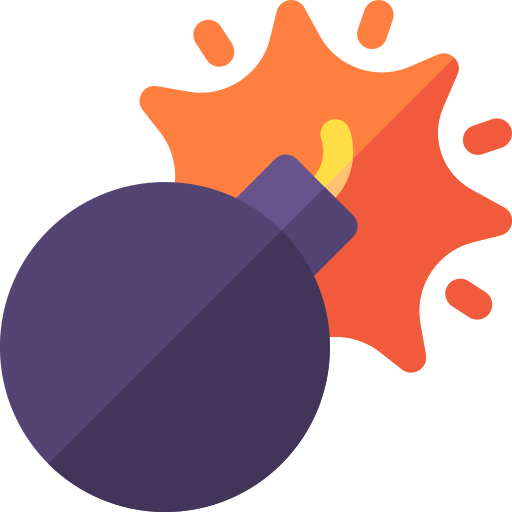
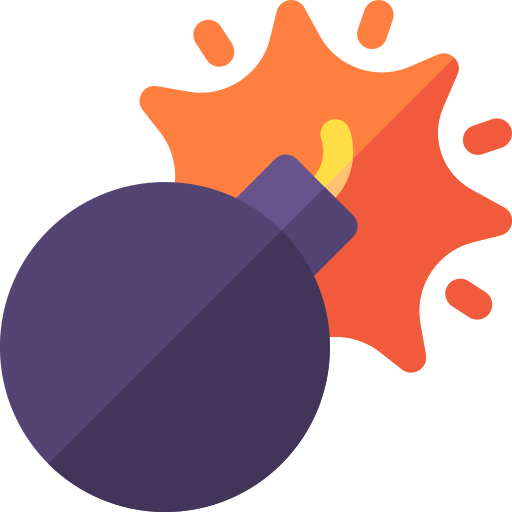
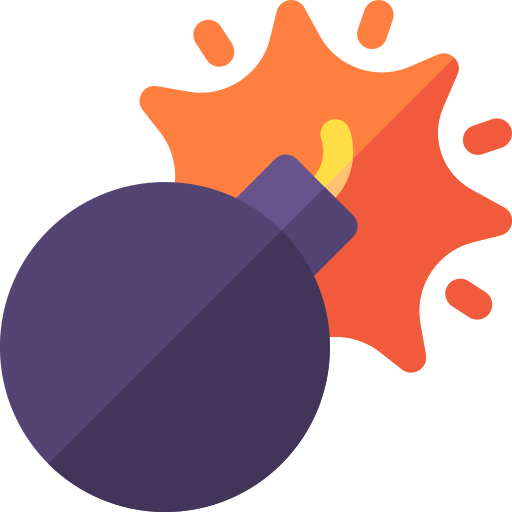
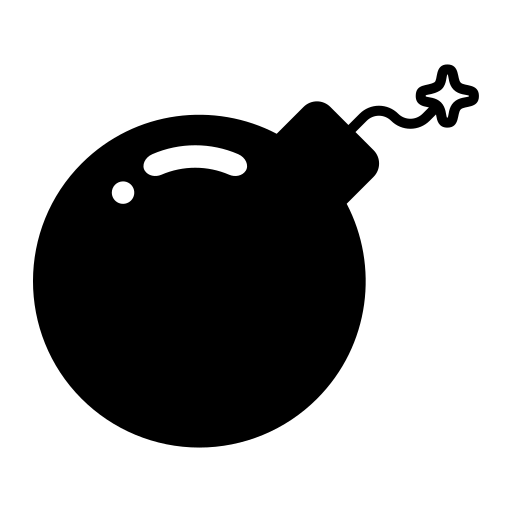
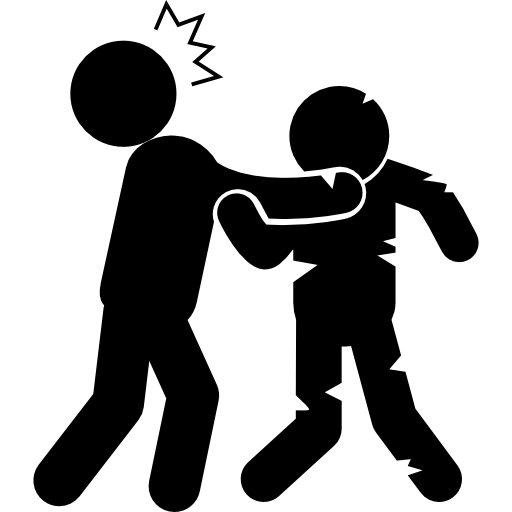
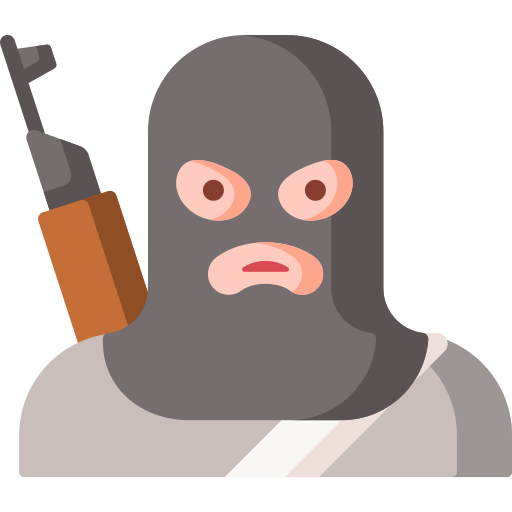
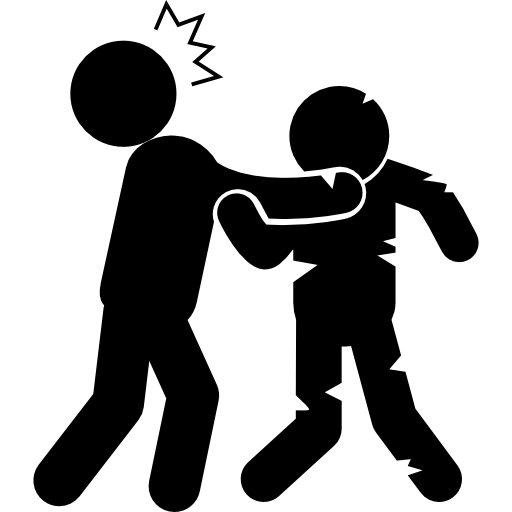
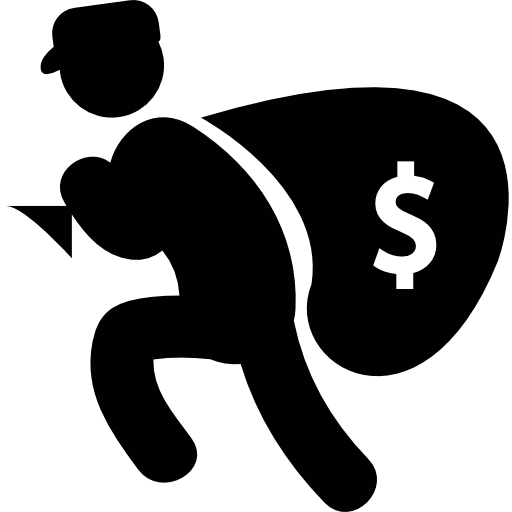
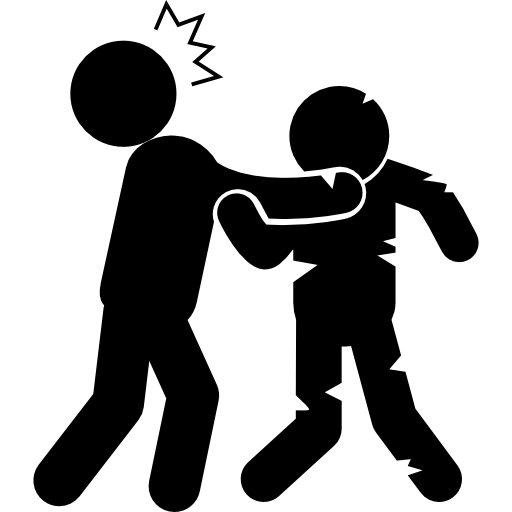
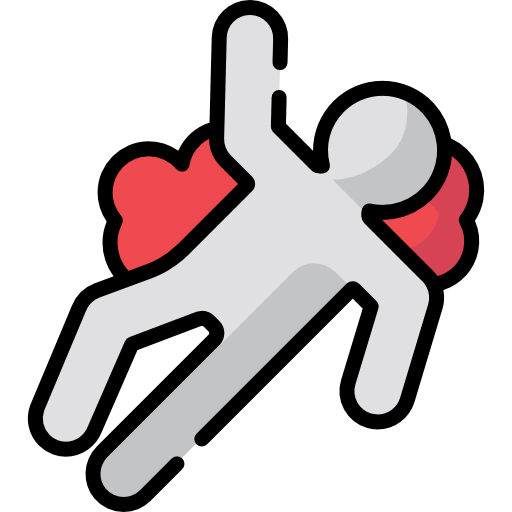
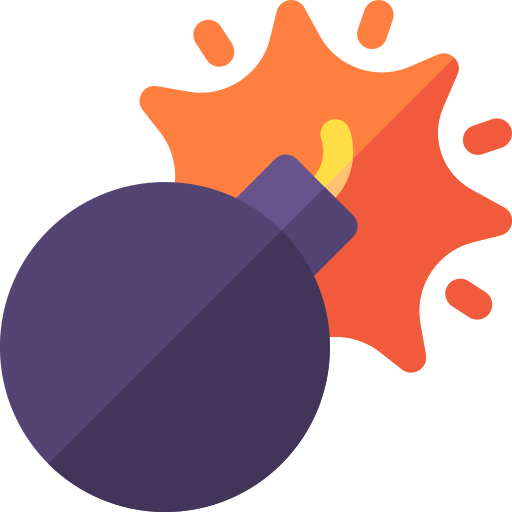
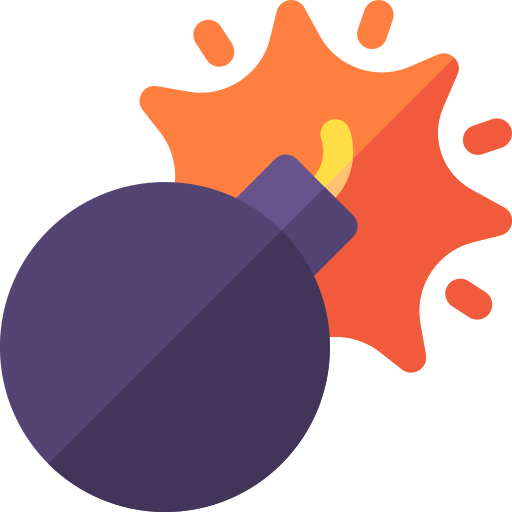
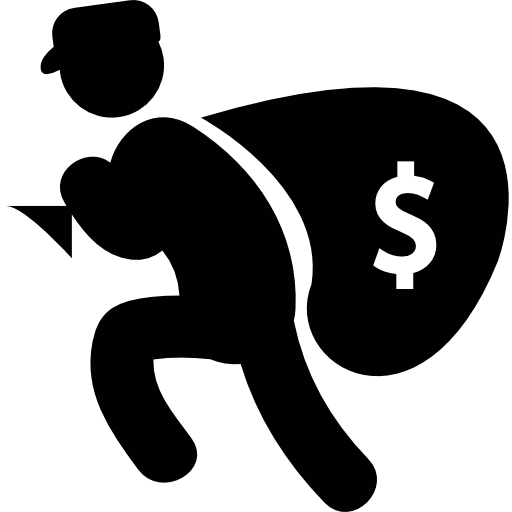
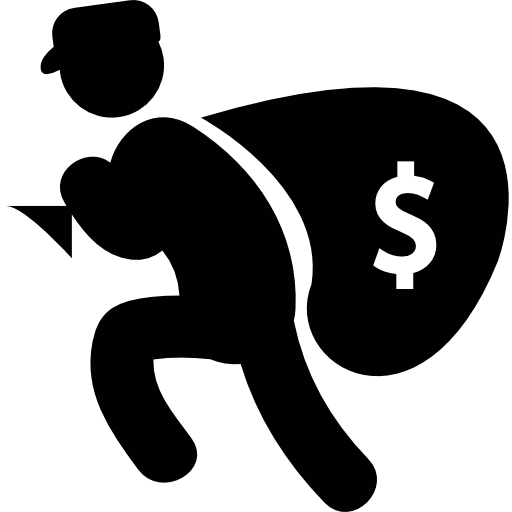
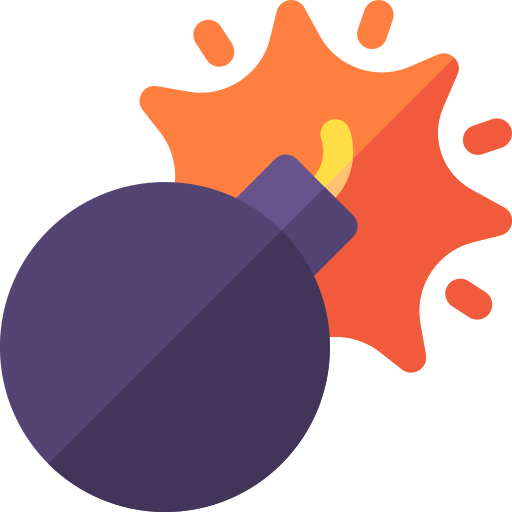
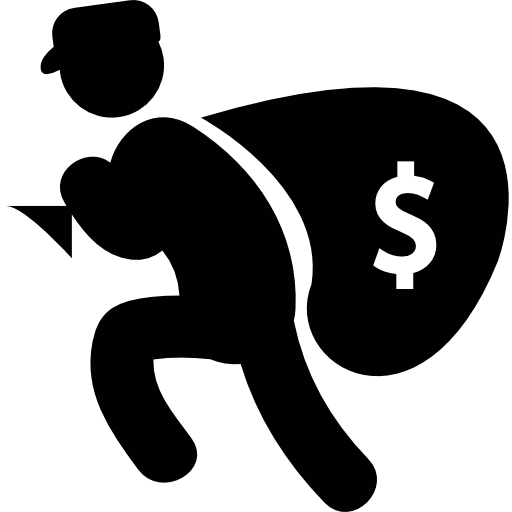
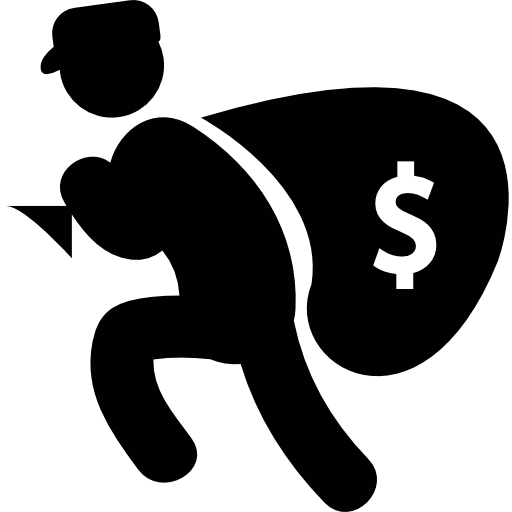
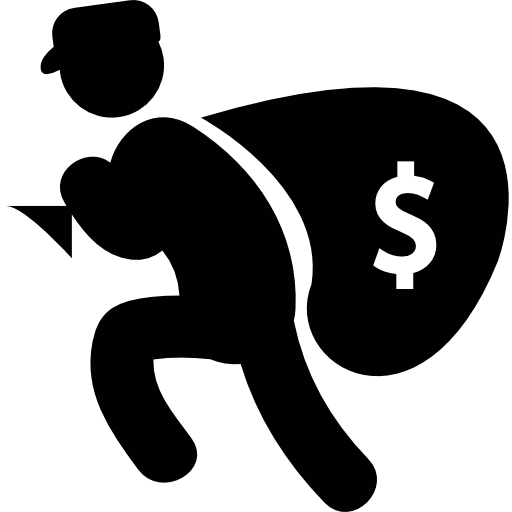
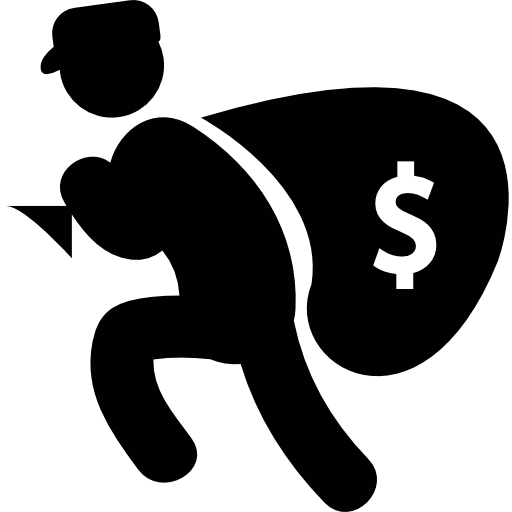
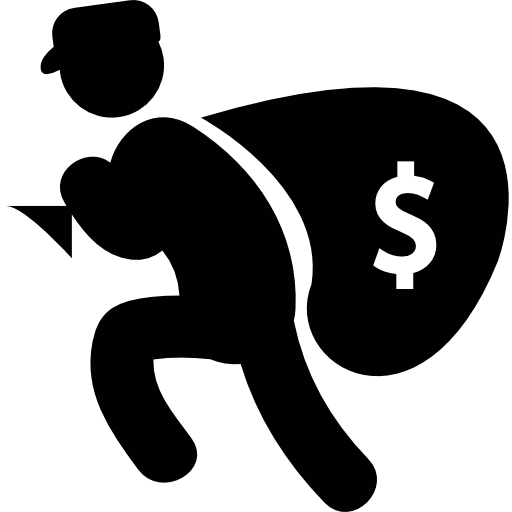
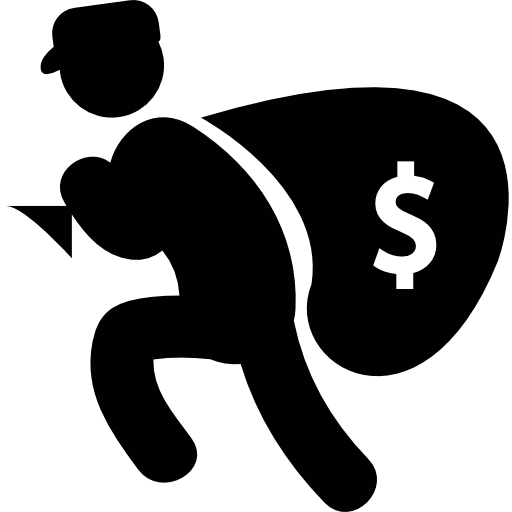
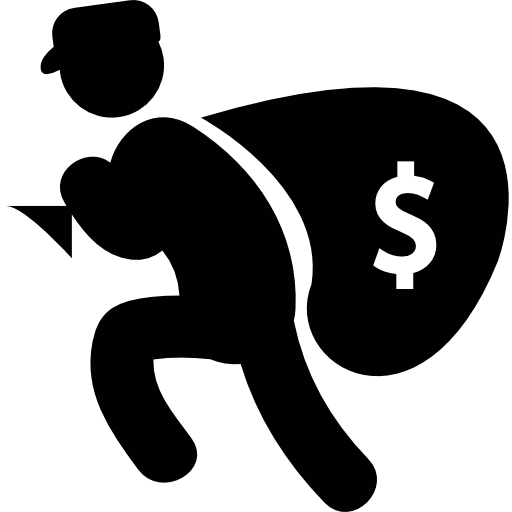
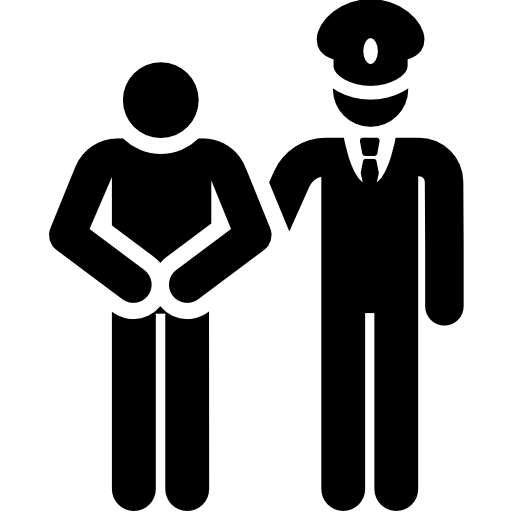
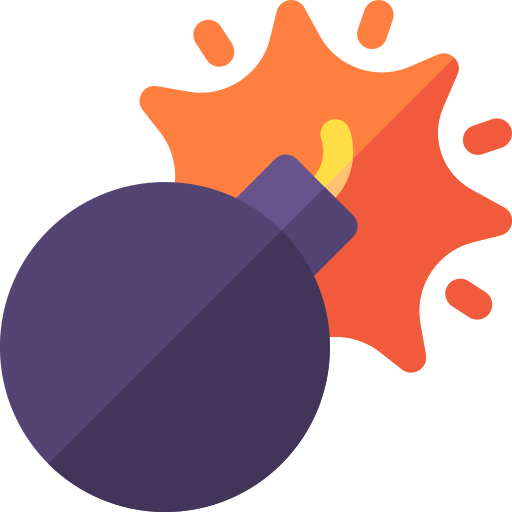
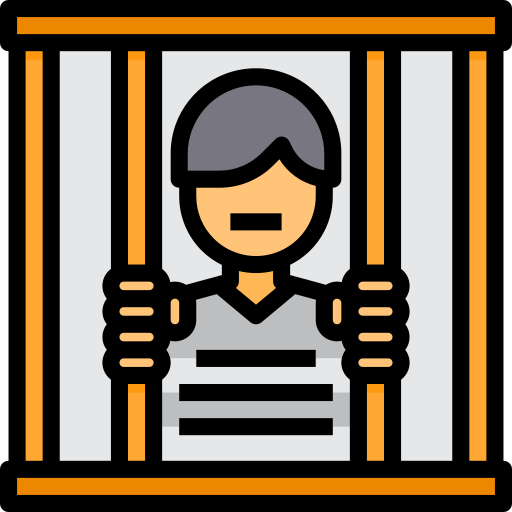
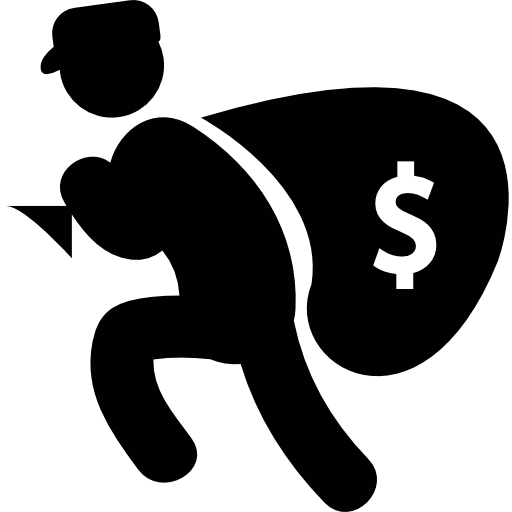
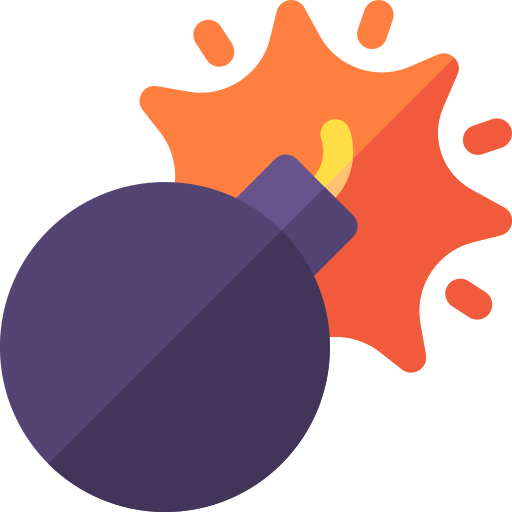
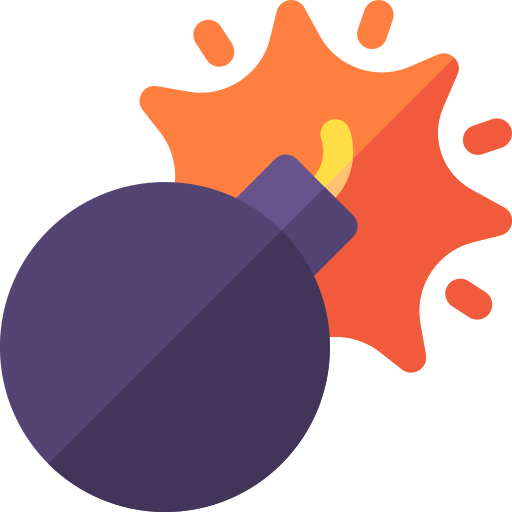
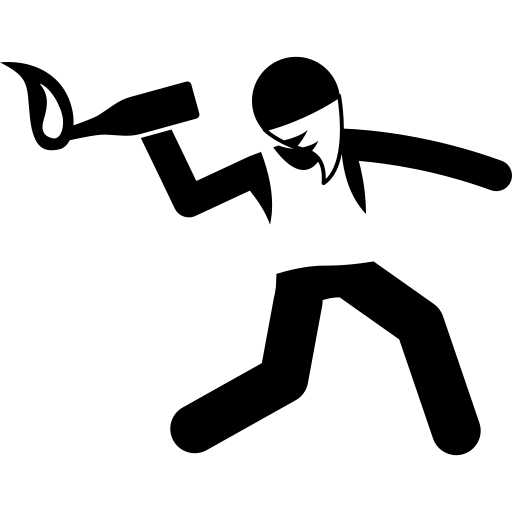
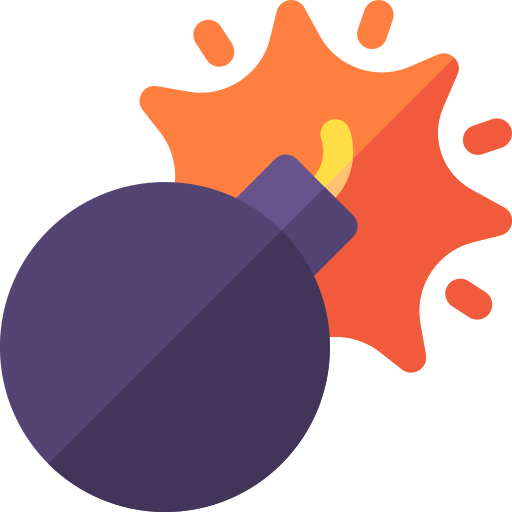
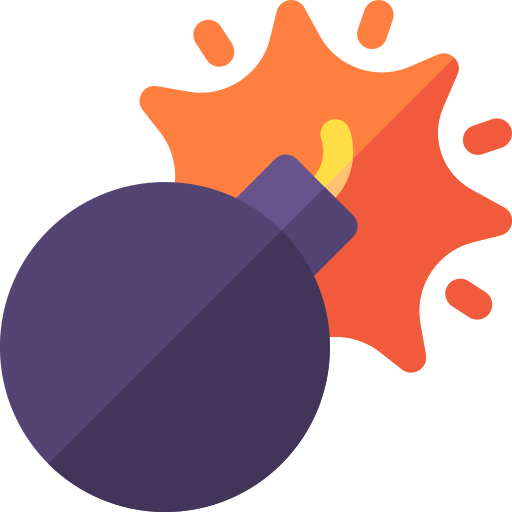
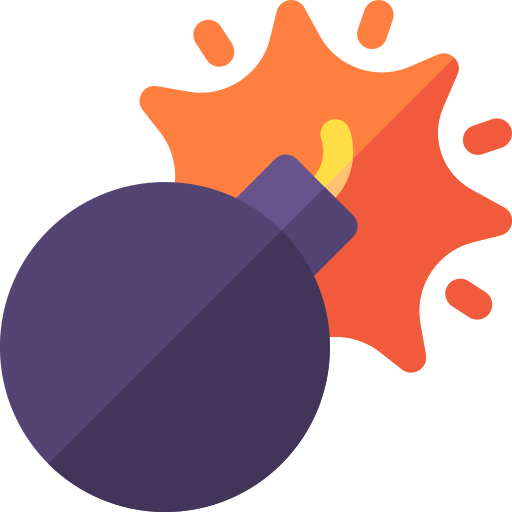

In [26]:
folium_map


### Agradecimentos
Agradecimento ao Dinis Carvalho.

Autores: [Francisco Batista](https://www.linkedin.com/in/kikobatistaa) 
[Tomás Pereira](https://www.linkedin.com/in/tomás-pereira-85407425b/)

